In this notebook plots for the thesis document are generated

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
import os
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from pls_regression import PLSRegression as PLSRegressionEdited
from pls_regression import CCA as CCAEdited
from scipy.stats.stats import pearsonr

from Code.preprocessing_final import preprocessing, reverse_preprocessing_img, generate_masks
from Code.audio_processing_final import create_spectrograms
from Code.bandpass_filter_final import lowhigh_normalize


path = "Document Plots/"

In [2]:
mask, mask_downsampled, mask_downsampled2x, roi, roid, roid2x = generate_masks(relevance_cutoff=0.25)
np.where(mask_downsampled2x == 1)[0].shape


(3072,)

In [3]:
spectrograms = create_spectrograms(FFT_overlap=0, plot=False, scaling="decibels")
model_dict = {"LR":"MLR", "RRR":"RRRR","PCR":"PCR", "PLS":"PLS-2"}

100%|████████████████████████████████████████████████████████████████████████████████| 204/204 [00:27<00:00,  7.53it/s]


### Plot length of spectrogram against EVS, forward

[0.09848109 0.13481373 0.14807979 0.17005957 0.17944654 0.1957173
 0.20250402] [0.02810331 0.04140568 0.04638952 0.05552588 0.05981328 0.06788572
 0.07174132]


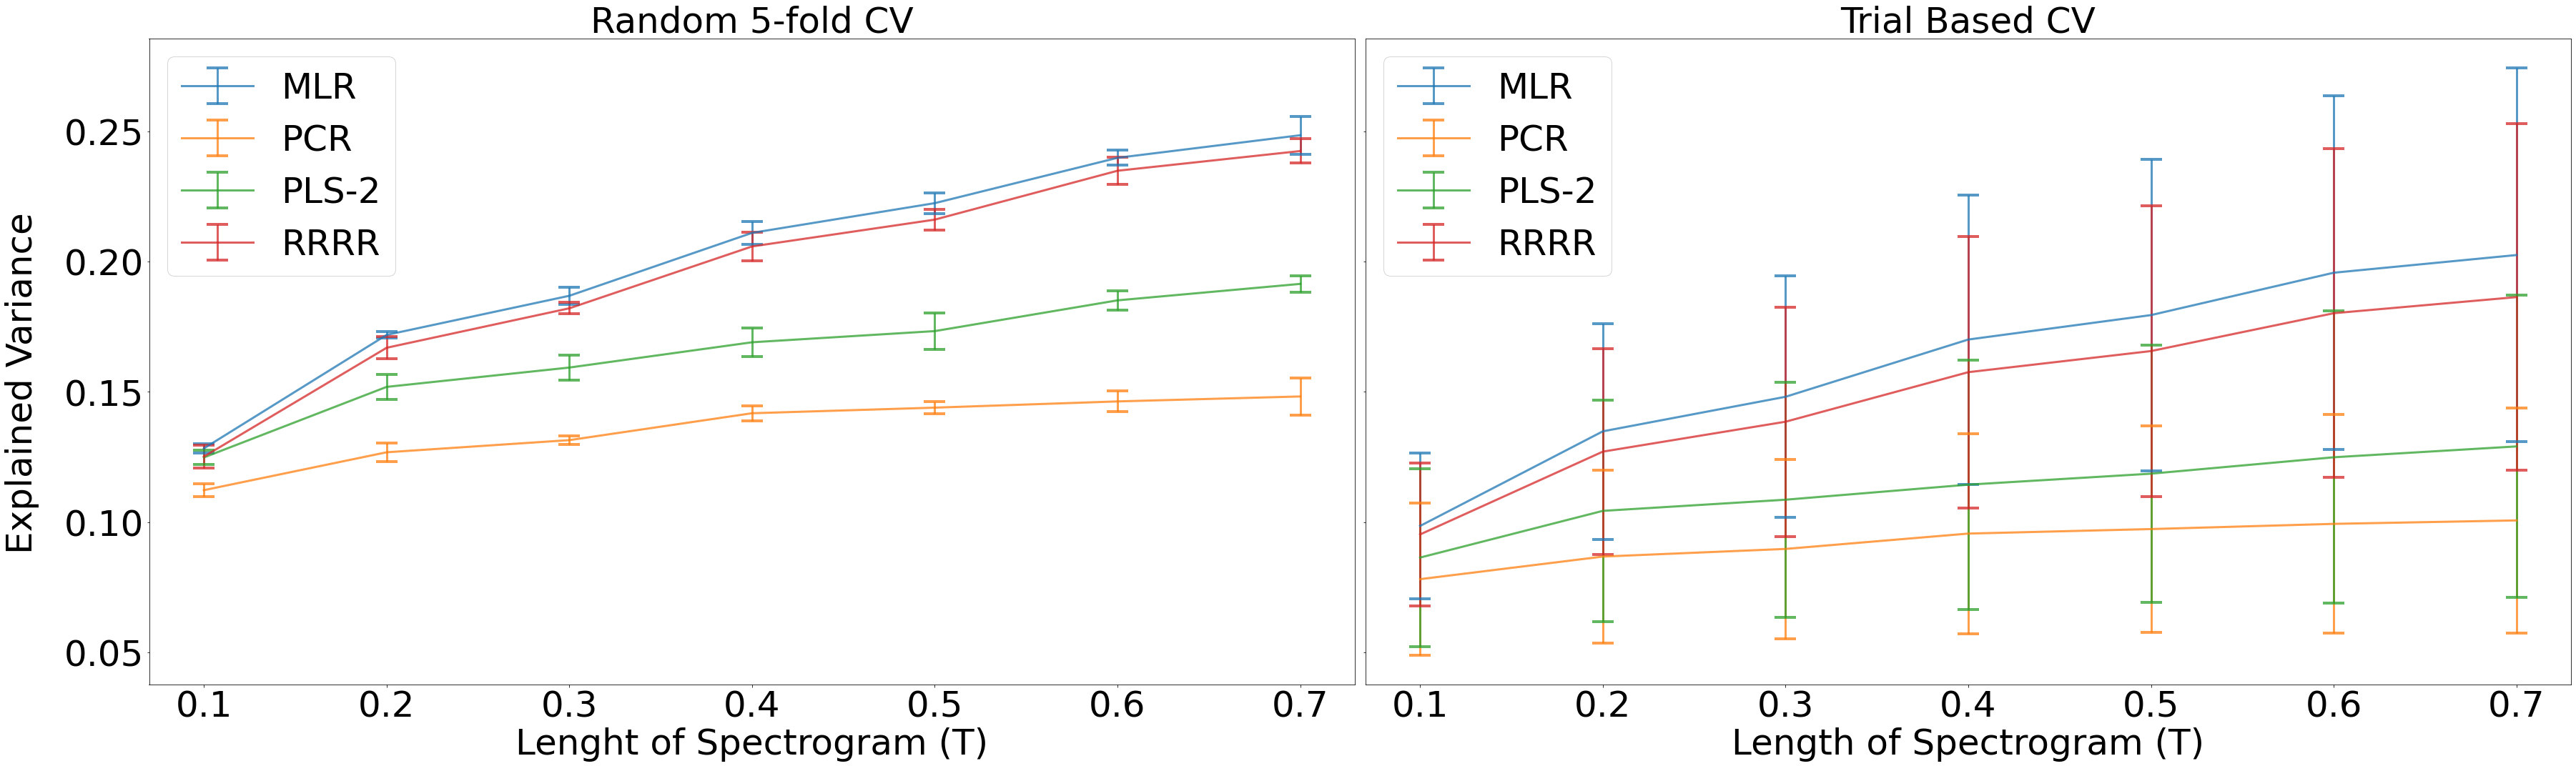

In [96]:
delays=[0.1]
input_durations=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
components=[1,5,10,15,20,25,30,35,40,45,50,75,100]
model_dict = {"LR":"MLR", "RRR":"RRRR","PCR":"PCR", "PLS":"PLS-2"}


models = ["LR", "PCR", "PLS", "RRR"]
datasets = ["complex_sub_subeset_None"]
component_models = models#[:-1]

title = ["Random 5-fold CV", "Trial Based CV"]
for dataset in datasets:
    xlabels = ["Lenght of Spectrogram (T)", "Length of Spectrogram (T)"]
    fig, ax =plt.subplots(1, 2, figsize=(50,15), sharey=True)
    for model in models:

        if model == "LR":
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_False_singleFalse_evs_ridge1000.npy")[0,:,0,:,:]
            average_scores = np.mean(cv_scores, axis=(1,2))
            yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
            #average_scores = np.array([average_scores[0] for i in input_durations])
            #yerr = np.array([yerr[0] for i in input_durations])
        elif model != "LR":
            if model == "RRR":
                cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_False_singleFalse_evs_ridge1000.npy")[0,:,5,:,:]
            elif model != "RRR":
                cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_False_singleFalse_evs_ridgeFalse.npy")[0,:,5,:,:]   
            average_scores = np.mean(cv_scores, axis=(1,2))
            yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        ax[0].errorbar(input_durations, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)

        if model == "LR":
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_False_singleFalse_evs_ridge1000.npy")[0,:,0,:,:]
            average_scores = np.mean(cv_scores, axis=(1,2))
            yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
            #average_scores = np.array([average_scores[0] for i in input_durations])
            #yerr = np.array([yerr[0] for i in input_durations])
            print(average_scores, yerr)
        elif model != "LR":
            if model == "RRR":
                cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_False_singleFalse_evs_ridge1000.npy")[0,:,5,:,:]
            elif model != "RRR":
                cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_False_singleFalse_evs_ridgeFalse.npy")[0,:,5,:,:]   
            average_scores = np.mean(cv_scores, axis=(1,2))
            yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        ax[1].errorbar(input_durations, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)

    for idx,axis in enumerate(ax):
        axis.legend(prop={'size': 50})
        axis.set_title(title[idx],fontdict={"size":50})
        axis.set_xlabel(xlabels[idx])
        axis.xaxis.label.set_size(50)
        axis.yaxis.label.set_size(50)
        axis.tick_params(axis='both', which='major', labelsize=50)
    #fig.suptitle(f"Comparison of different CV-Methods, components are limited to 25 for consistency, {dataset}", fontsize=50)
    
    fig.text(0, 0.5, 'Explained Variance', va='center', rotation='vertical', fontdict={'fontsize':50})
    fig.tight_layout(rect=[0.02,0,1,1])

    fig.savefig(f"{path}EVS_cross_CVMethods_length_forward_{dataset}.png")
    plt.show()

### Plot length of spectrogram against EVS, backward

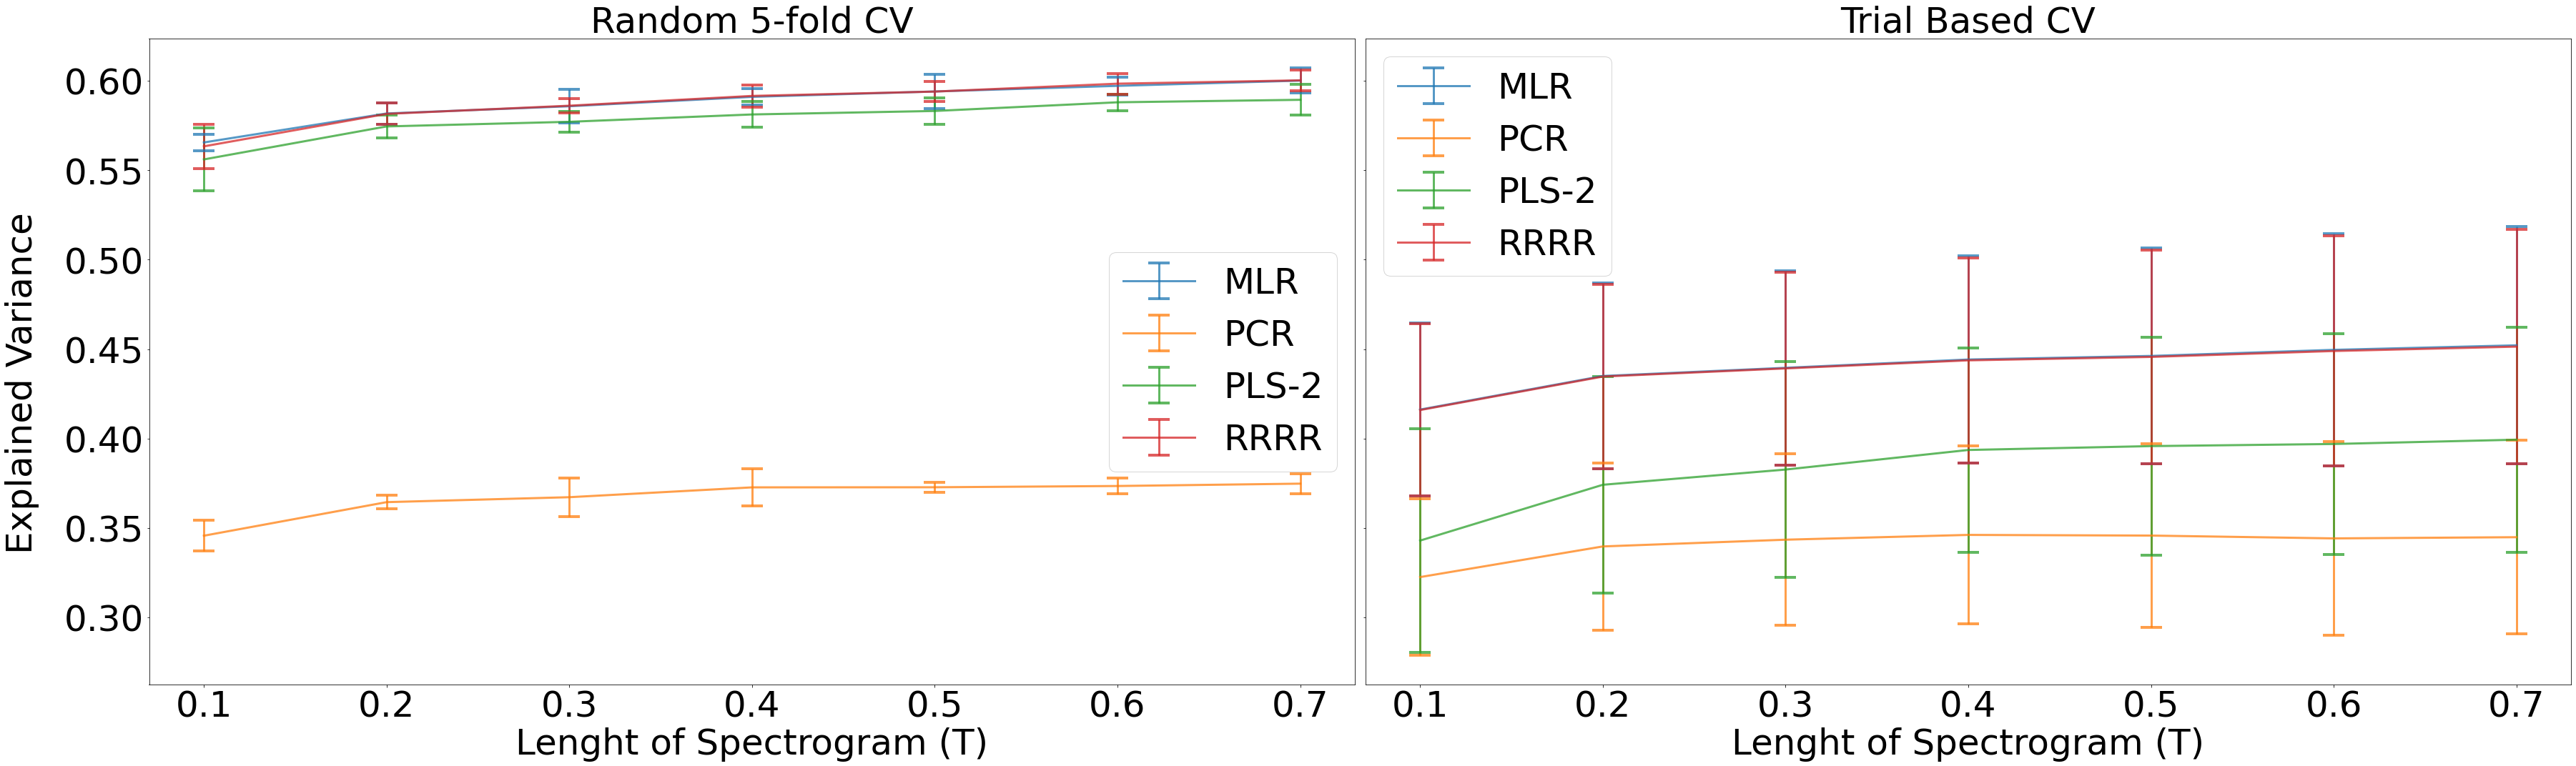

In [101]:
delays=[0.1]
input_durations=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
components=[1,5,10,15,20,25,30,35,40,45,50,75,100]
models = ["LR", "PCR", "PLS", "RRR"]
datasets = ["complex_sub_subeset_None"]

title = ["Random 5-fold CV", "Trial Based CV"]
for dataset in datasets:
    xlabels = ["Lenght of Spectrogram (T)", "Lenght of Spectrogram (T)"]
    fig, ax =plt.subplots(1, 2, figsize=(50,15), sharey=True)
    
    for model in models:
        average_scores = []
        yerr = []
        for i, duration in enumerate(input_durations):
            if model == "LR":
                cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_True_singleFalse_duration[{duration}]_evs_ridge10000.npy")[0,0,0,:,:]
            elif model != "LR":
                if model == "RRR":
                    cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_True_singleFalse_duration[{duration}]_evs_ridge10000.npy")[0,0,5,:,:]
                elif model != "RRR":
                    cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_True_singleFalse_duration[{duration}]_evs_ridgeFalse.npy")[0,0,5,:,:]
            average_scores.append(np.mean(cv_scores, axis=(0,1)))
            yerr.append(np.std(np.mean(cv_scores, axis=(1)), axis=0))
        
        ax[0].errorbar(input_durations, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)


    for model in models:
        average_scores = []
        yerr = []
        for i, duration in enumerate(input_durations):
            if model == "LR":
                cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_True_singleFalse_duration[{duration}]_evs_ridge10000.npy")[0,0,0,:,:]
            elif model != "LR":
                if model == "RRR":
                    cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_True_singleFalse_duration[{duration}]_evs_ridge10000.npy")[0,0,5,:,:]            
                elif model != "RRR":
                    cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_True_singleFalse_duration[{duration}]_evs_ridgeFalse.npy")[0,0,5,:,:]             
            average_scores.append(np.mean(cv_scores, axis=(0,1)))
            yerr.append(np.std(np.mean(cv_scores, axis=(1)), axis=0))
        
        ax[1].errorbar(input_durations, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)

    for idx,axis in enumerate(ax):
        axis.legend(prop={'size': 50})
        axis.set_title(title[idx],fontdict={"size":50})
        axis.set_xlabel(xlabels[idx])
        axis.xaxis.label.set_size(50)
        axis.yaxis.label.set_size(50)
        axis.tick_params(axis='both', which='major', labelsize=50)
    #fig.suptitle(f"Comparison of different CV-Methods, components are limited to 25 for consistency, {dataset}, reversed direction", fontsize=50)
    fig.text(0, 0.5, 'Explained Variance', va='center', rotation='vertical', fontdict={'fontsize':50})
    fig.tight_layout(rect=[0.02,0,1,1])


    fig.savefig(f"{path}EVS_cross_CVMethods_length_backward_{dataset}.png")
    plt.show()

### Plot number of components against EVS, forward

LR [0.18686213 0.18686213 0.18686213 0.18686213 0.18686213 0.18686213
 0.18686213 0.18686213 0.18686213 0.18686213 0.18686213 0.18686213
 0.18686213]
PCR [0.01672701 0.05115332 0.08961302 0.1117463  0.12385354 0.131434
 0.1377504  0.14126662 0.14594116 0.14885889 0.15256591 0.1589326
 0.16352438]
PLS [0.01689466 0.08233731 0.11160359 0.13346321 0.14817304 0.15930128
 0.16999038 0.17524169 0.18059403 0.18382846 0.18613102 0.19363111
 0.19503012]
RRR [0.0412022  0.1141304  0.1484498  0.16646028 0.17659717 0.18205318
 0.18583298 0.18818011 0.18959554 0.19056149 0.19118012 0.19147316
 0.19073054]


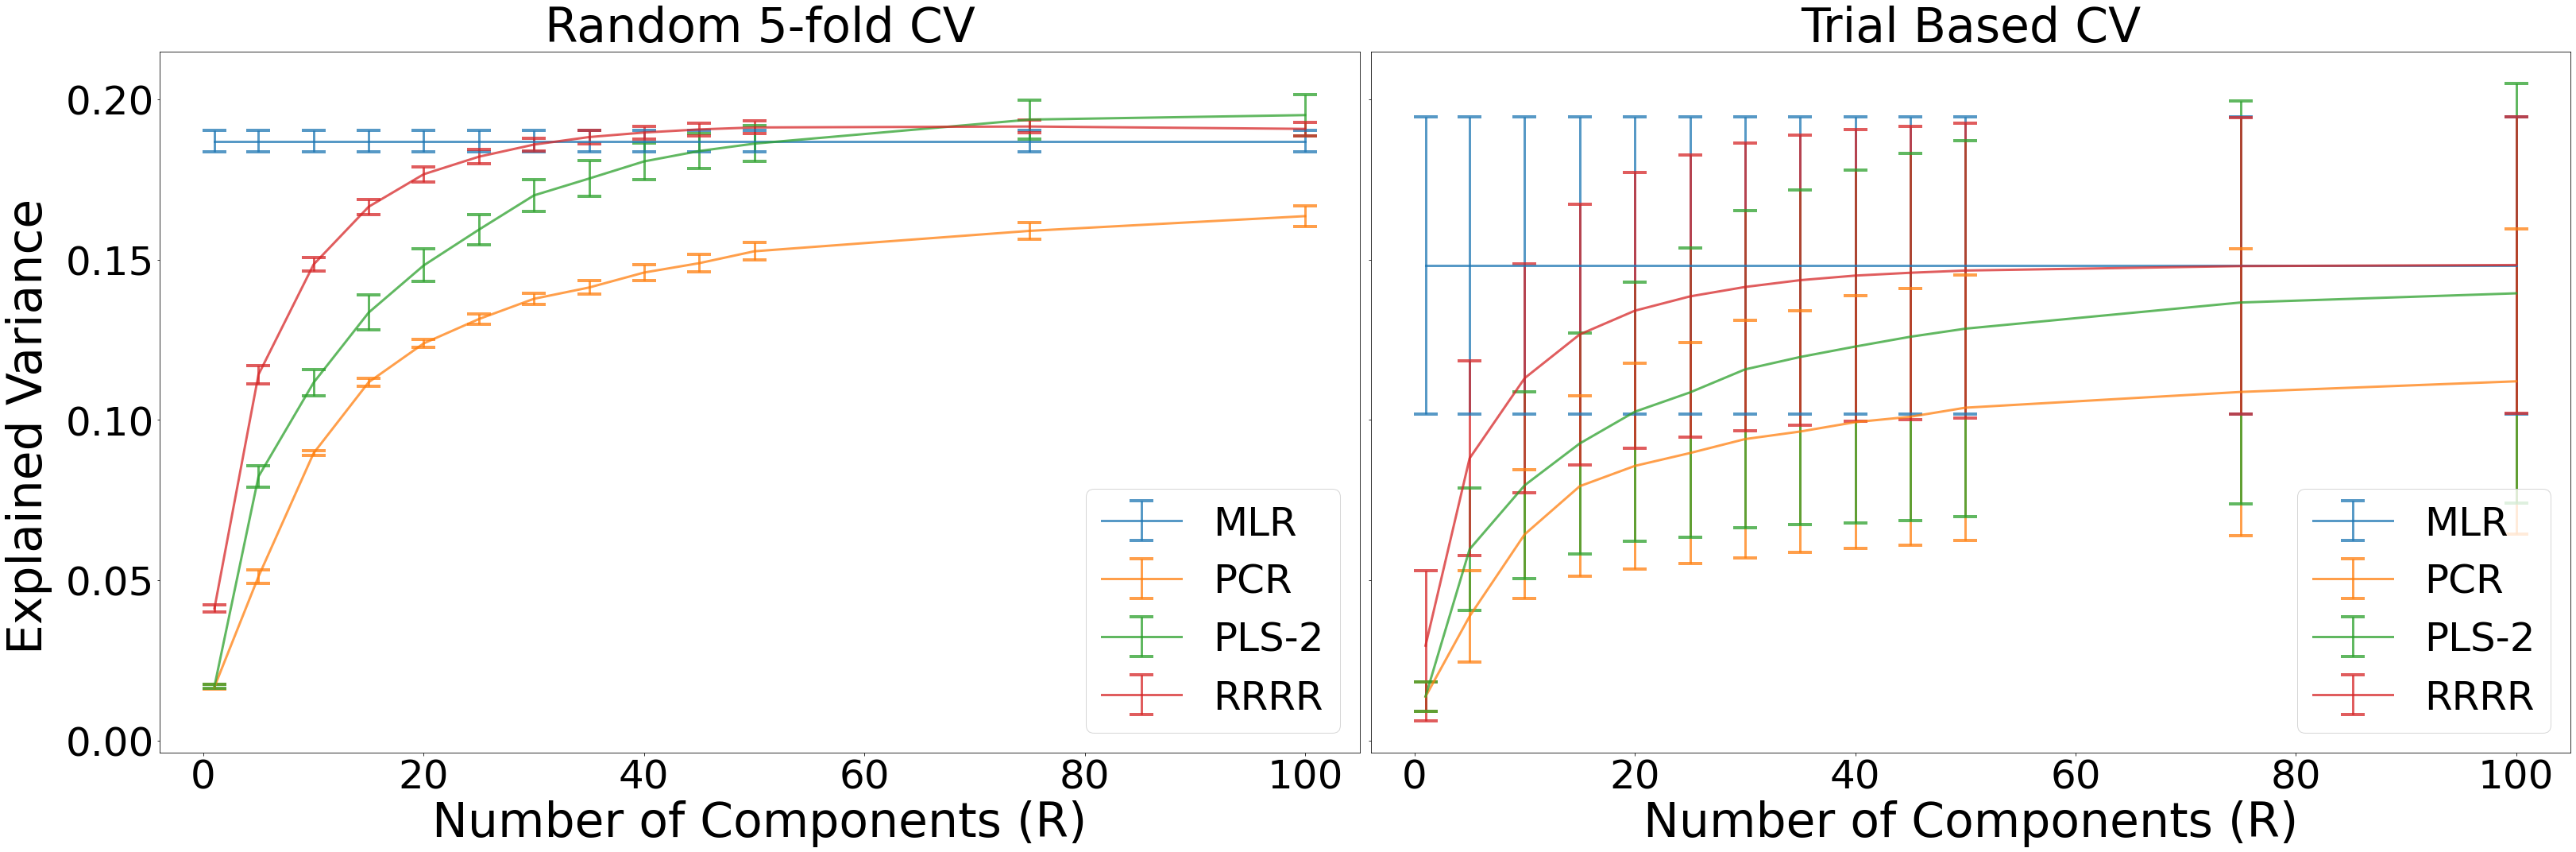

In [102]:
delays=[0.1]
input_durations=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
components=[1,5,10,15,20,25,30,35,40,45,50,75,100]

models = ["LR", "PCR", "PLS", "RRR"]
datasets = ["complex_sub_subeset_None"]
component_models = models#[:-1]

title = ["Random 5-fold CV", "Trial Based CV"]
for dataset in datasets:
    xlabels = ["Number of Components (R)", "Number of Components (R)"]
    fig, ax =plt.subplots(1, 2, figsize=(45,15), sharey=True)
    for model in models:

        if model in ["LR", "RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_False_singleFalse_evs_ridge1000.npy")[0,2,:,:,:]
        elif model not in ["LR", "RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_False_singleFalse_evs_ridgeFalse.npy")[0,2,:,:,:]   
        average_scores = np.mean(cv_scores, axis=(1,2))
        yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        
        if model == "LR":
            average_scores = np.array([average_scores[0] for i in components])
            yerr = np.array([yerr[0] for i in components])        
        print(model, average_scores)
        ax[0].errorbar(components, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)

        if model in ["LR", "RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_False_singleFalse_evs_ridge1000.npy")[0,2,:,:,:]
        elif model not in ["LR", "RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_False_singleFalse_evs_ridgeFalse.npy")[0,2,:,:,:]   
        average_scores = np.mean(cv_scores, axis=(1,2))
        yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        
        if model == "LR":
            average_scores = np.array([average_scores[0] for i in components])
            yerr = np.array([yerr[0] for i in components])        
        
        ax[1].errorbar(components, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)
        

    for idx,axis in enumerate(ax):
        axis.legend(prop={'size': 50})
        axis.set_title(title[idx],fontdict={"size":60})
        axis.set_xlabel(xlabels[idx])
        axis.xaxis.label.set_size(60)
        axis.yaxis.label.set_size(60)
        axis.tick_params(axis='both', which='major', labelsize=50)
    #fig.suptitle(f"Comparison of different CV-Methods, components are limited to 25 for consistency, {dataset}", fontsize=50)
    fig.text(0, 0.5, 'Explained Variance', va='center', rotation='vertical', fontdict={'fontsize':60})
    fig.tight_layout(rect=[0.02,0,1,1])


    fig.savefig(f"{path}EVS_cross_CVMethods_components_forward_{dataset}.png")
    plt.show()

LR [-0.71169437 -0.71169437 -0.71169437 -0.71169437 -0.71169437 -0.71169437
 -0.71169437 -0.71169437 -0.71169437 -0.71169437 -0.71169437 -0.71169437
 -0.71169437]
PCR [-0.08518377 -0.20058595 -0.30849741 -0.36555117 -0.4133723  -0.45626651
 -0.5378782  -0.6029347  -0.61539808 -0.66199836 -0.67828065 -0.75988532
 -0.80161461]
PLS [-0.08859319 -0.25204917 -0.36670099 -0.51721871 -0.65095302 -0.75256839
 -0.82134583 -0.89168435 -0.99032521 -1.06531899 -1.08989155 -1.33722322
 -1.5029199 ]
RRR [-0.16870838 -0.39677856 -0.50553225 -0.57140701 -0.61845457 -0.6511338
 -0.6694763  -0.67811035 -0.68336593 -0.68816599 -0.69138885 -0.7030715
 -0.70606987]


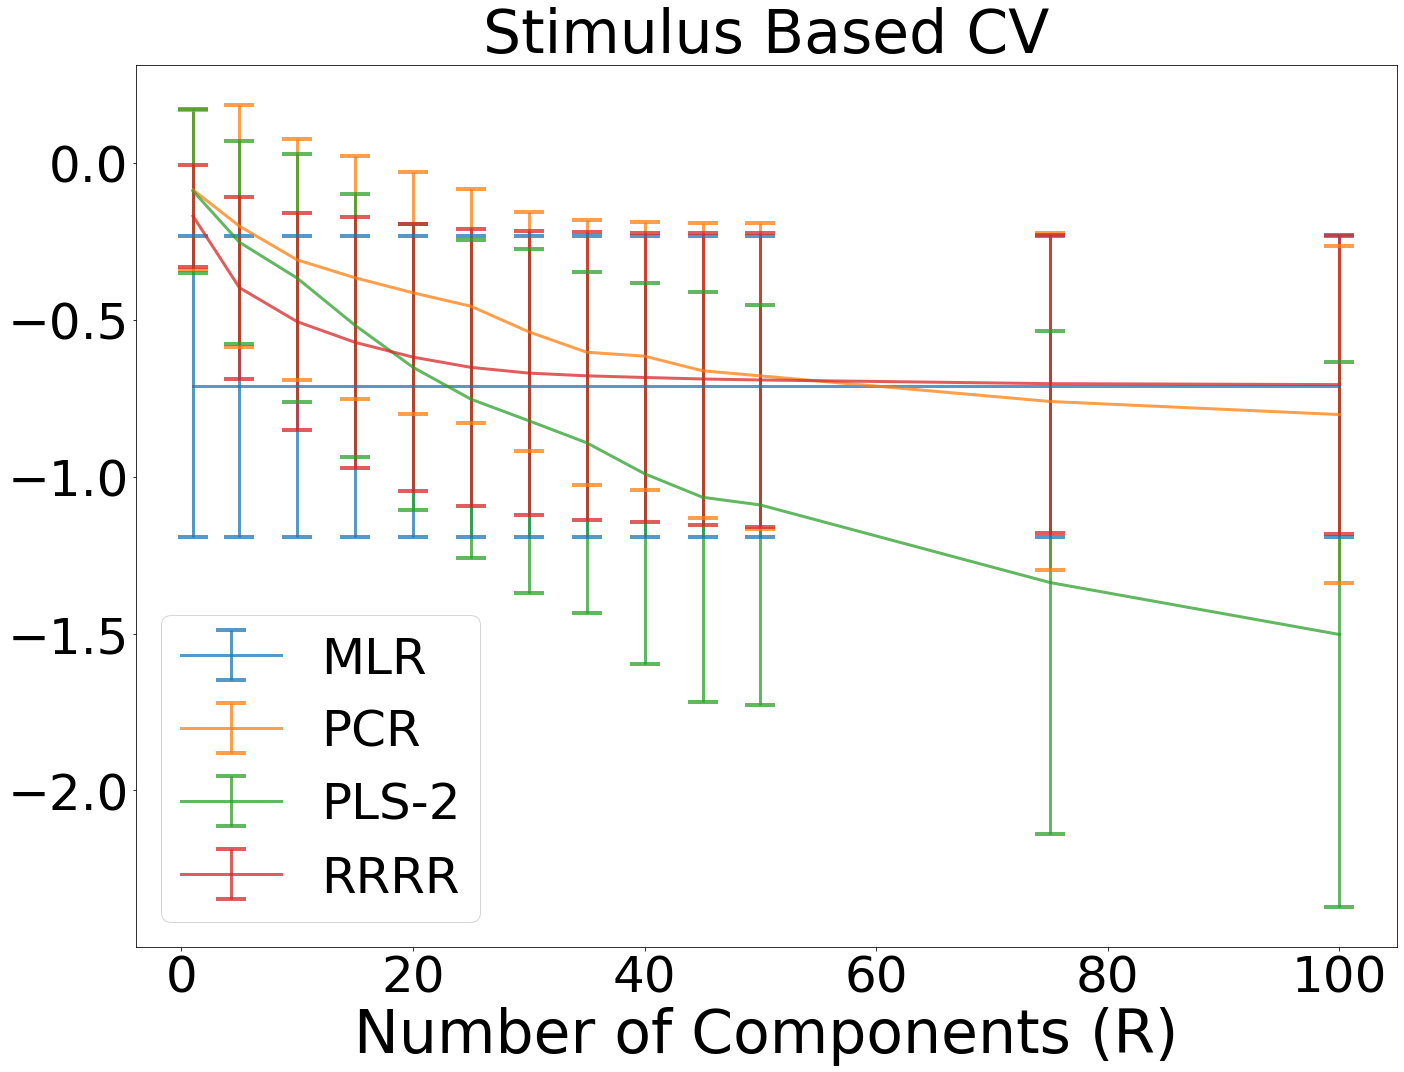

In [103]:
delays=[0.1]
input_durations=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
components=[1,5,10,15,20,25,30,35,40,45,50,75,100]

models = ["LR", "PCR", "PLS", "RRR"]
datasets = ["complex_sub_subeset_None"]
component_models = models#[:-1]

title = [ "Stimulus Based CV"]
for dataset in datasets:
    xlabels = ["Number of Components (R)"]
    fig, ax =plt.subplots(1, 1, figsize=(20,15), sharey=True)
    for model in models:

        if model in ["LR", "RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_newstim_False_singleFalse_evs_ridge1000.npy")[0,0,:,:,:]
        elif model not in ["LR", "RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_newstim_False_singleFalse_evs_ridgeFalse.npy")[0,0,:,:,:]   
        average_scores = np.mean(cv_scores, axis=(1,2))
        yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        
        if model == "LR":
            average_scores = np.array([average_scores[0] for i in components])
            yerr = np.array([yerr[0] for i in components])        
        print(model, average_scores)
        ax.errorbar(components, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)
        
        ax.legend(prop={'size': 50})
        ax.set_title(title[0],fontdict={"size":60})
        ax.set_xlabel(xlabels[0])
        ax.xaxis.label.set_size(60)
        ax.yaxis.label.set_size(60)
        ax.tick_params(axis='both', which='major', labelsize=50)
    #fig.suptitle(f"Comparison of different CV-Methods, components are limited to 25 for consistency, {dataset}", fontsize=50)
    #fig.text(0, 0.5, 'Explained Variance', va='center', rotation='vertical', fontdict={'fontsize':60})
    fig.tight_layout(rect=[0.02,0,1,1])


    fig.savefig(f"{path}EVS_cross_CVMethodsNewstim_components_forward_{dataset}.png")
    plt.show()

### Plot number of components against EVS, backward

LR [0.43958428 0.43958428 0.43958428 0.43958428 0.43958428 0.43958428
 0.43958428 0.43958428 0.43958428 0.43958428 0.43958428 0.43958428
 0.43958428]
PCR [0.00407359 0.21259715 0.24918089 0.2697958  0.31688891 0.3434858
 0.37108392 0.37034601 0.37643629 0.38787189 0.3916279  0.39154554
 0.39141318]
PLS [0.22300669 0.36548371 0.37151886 0.37968271 0.38809426 0.38269822
 0.37851822 0.3669376  0.35668288 0.34868098 0.34094888 0.30807525
 0.28016414]
RRR [0.32565062 0.42238823 0.43416887 0.43783092 0.43879774 0.4392475
 0.43948874 0.43959017 0.43968224 0.43973754 0.43974952 0.43979641
 0.43976164]


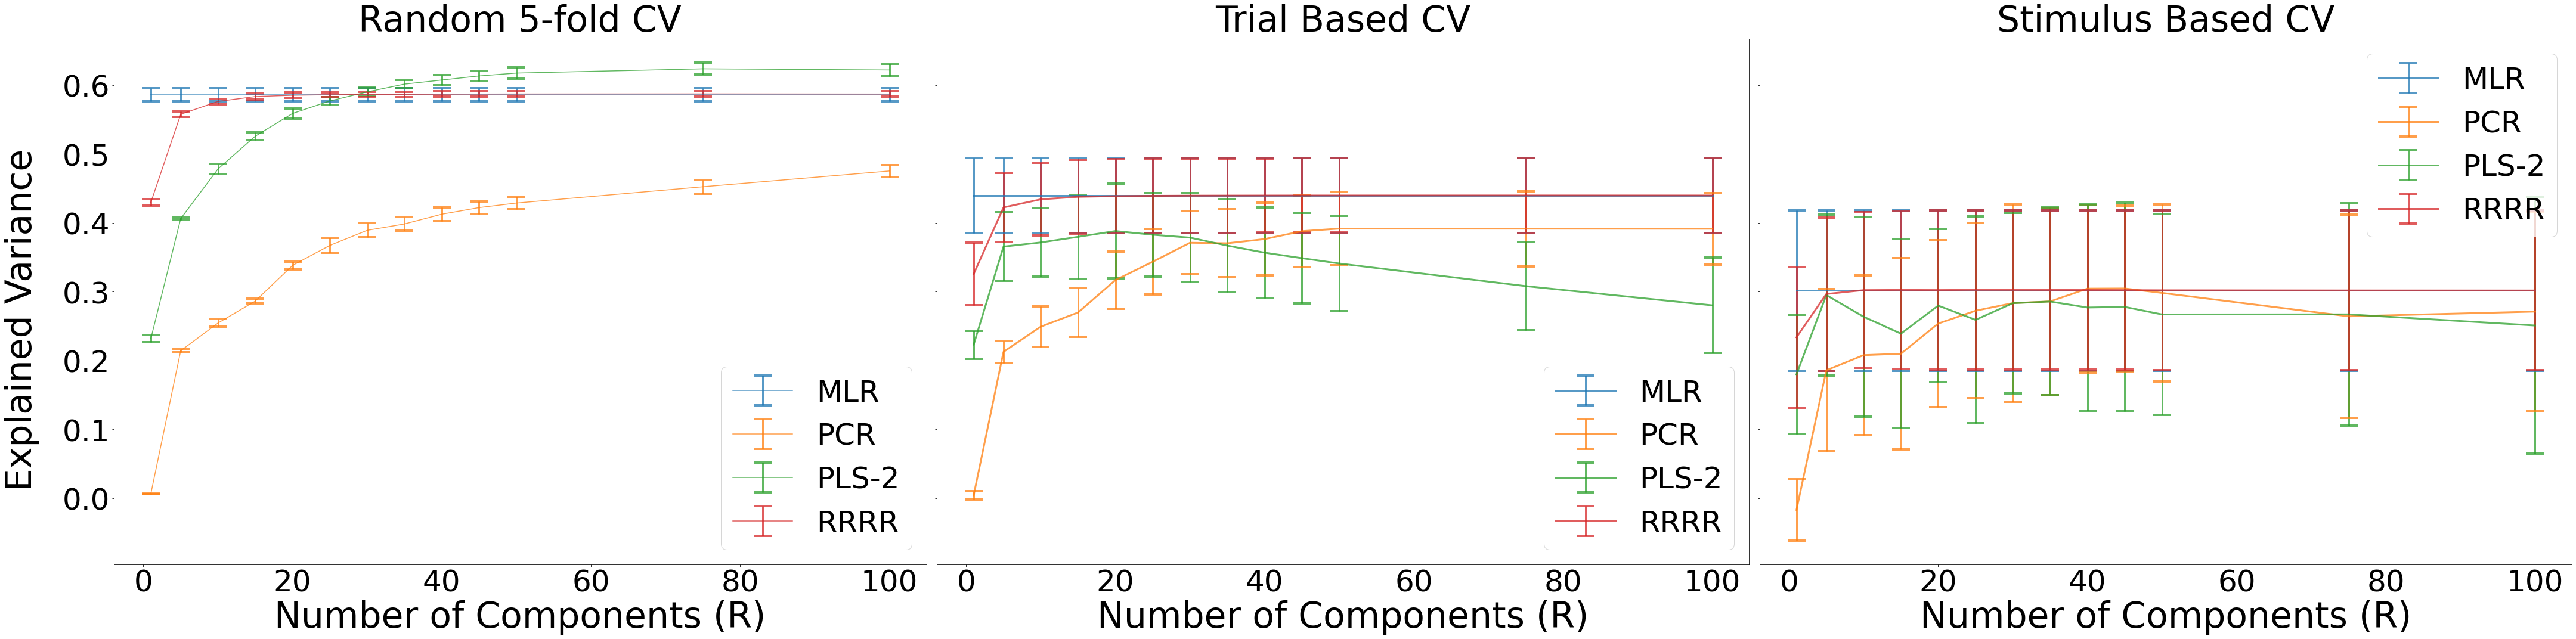

In [104]:
delays=[0.1]
input_durations=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
components=[1,5,10,15,20,25,30,35,40,45,50,75,100]
models = ["LR", "PCR", "PLS", "RRR"]
datasets = ["complex_sub_subeset_None"]

duration = input_durations[2]
title = ["Random 5-fold CV", "Trial Based CV", "Stimulus Based CV"]
for dataset in datasets:
    xlabels = ["Number of Components (R)", "Number of Components (R)", "Number of Components (R)"]
    fig, ax =plt.subplots(1, 3, figsize=(60,15), sharey=True)
    for model in models:
        if model in ["LR","RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_True_singleFalse_duration[{duration}]_evs_ridge10000.npy")[0,0,:,:,:]
        else:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_default_True_singleFalse_duration[{duration}]_evs_ridgeFalse.npy")[0,0,:,:,:]
        average_scores = np.mean(cv_scores, axis=(1,2))
        yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        if model == "LR":
            average_scores = np.array([average_scores[0] for i in components])
            yerr = np.array([yerr[0] for i in components])
        
        ax[0].errorbar(components, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3)


    for model in models:
        if model in ["LR","RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_True_singleFalse_duration[{duration}]_evs_ridge10000.npy")[0,0,:,:,:]
        else:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_trial_True_singleFalse_duration[{duration}]_evs_ridgeFalse.npy")[0,0,:,:,:]
        average_scores = np.mean(cv_scores, axis=(1,2))
        yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        if model == "LR":
            average_scores = np.array([average_scores[0] for i in components])
            yerr = np.array([yerr[0] for i in components])
        print(model, average_scores)
        ax[1].errorbar(components, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)
        
        
    for model in models:
        if model in ["LR","RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_newstim_True_singleFalse_duration[{duration}]_evs_ridge10000.npy")[0,0,:,:,:]
        elif model not in ["LR","RRR"]:
            cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_newstim_True_singleFalse_duration[{duration}]_evs_ridgeFalse.npy")[0,0,:,:,:]
        average_scores = np.mean(cv_scores, axis=(1,2))
        yerr = np.std(np.mean(cv_scores, axis=(2)), axis=1)
        if model == "LR":
            average_scores = np.array([average_scores[0] for i in components])
            yerr = np.array([yerr[0] for i in components])
        
        ax[2].errorbar(components, average_scores, yerr=yerr, label=model_dict[model], alpha=.75, capsize=15, capthick=4, elinewidth=3,linewidth=3)

    for idx,axis in enumerate(ax):
        axis.legend(prop={'size': 50})
        axis.set_title(title[idx],fontdict={"size":60})
        axis.set_xlabel(xlabels[idx])
        axis.xaxis.label.set_size(60)
        axis.yaxis.label.set_size(60)
        axis.tick_params(axis='both', which='major', labelsize=50)
    #fig.suptitle(f"Comparison of different CV-Methods, components are limited to 25 for consistency, {dataset}, reversed direction", fontsize=50)
    fig.text(0, 0.5, 'Explained Variance', va='center', rotation='vertical', fontdict={'fontsize':60})
    fig.tight_layout(rect=[0.02,0,1,1])


    fig.savefig(f"{path}EVS_cross_CVMethods_length_components_backward_{dataset}.png")
    plt.show()

# EVS resolved in the output spaces
## Forward

[-0.1248816661116574, 0.46178819570242224, -0.1229515368602174, 0.35838546275512106, -0.13711957665869928, 0.429906817731938, -0.10671801146618014, 0.4563392740451486]


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 86644.14it/s]


(2, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 86670.20it/s]


(2, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 92741.51it/s]


(2, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 92618.10it/s]


(2, 5360) (5360,)


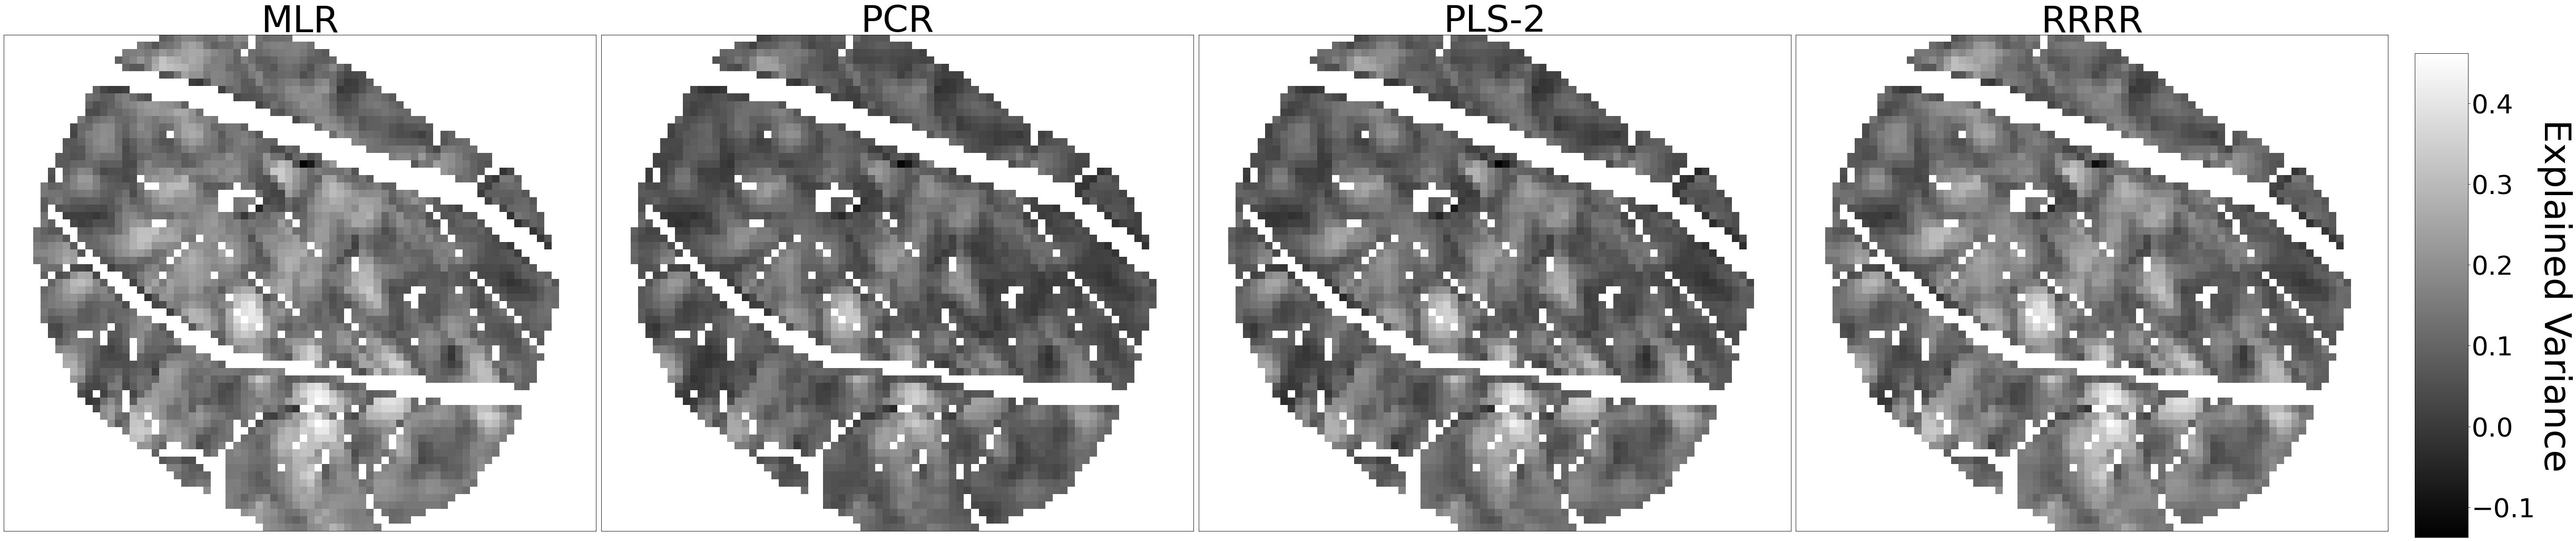

In [56]:
models = ["LR", "PCR", "PLS", "RRR"]
cv = "trial"
dataset = "complex_sub_subeset_None"
minmax_total = []
for m, model in enumerate(models):
    if model == "LR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridge1000.npy")[0,2,0,:,:]       
    elif model == "RRR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridge1000.npy")[0,2,5,:,:]
    else:
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridgeFalse.npy")[0,2,5,:,:]   
    average_scores = np.mean(cv_scores, axis=(0))
    minmax_total.extend([average_scores.min(), average_scores.max()])
print(minmax_total)
vmin, vmax = min(minmax_total), max(minmax_total)
fig, ax = plt.subplots(1,4,figsize=(70,15))
for m, model in enumerate(models):
    if model == "LR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridge1000.npy")[0,2,0,:,:]       
    elif model == "RRR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridge1000.npy")[0,2,5,:,:]
    else:
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridgeFalse.npy")[0,2,5,:,:]   
    average_scores = np.mean(cv_scores, axis=(0))
    temp = np.array([average_scores, average_scores])
    threshold = np.mean(average_scores) + 4*np.std(average_scores)
    im = ax[m].imshow(reverse_preprocessing_img(temp, relevance_cutoff=0.25, ds=4)[0], cmap="gray", vmin=vmin, vmax=vmax)
    ax[m].tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)
    ax[m].set_title(model_dict[model], fontsize=70)
fig.tight_layout()         
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.05, 0.02, 0.85])

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=50)  
cbar.set_label('Explained Variance', rotation=270, fontsize=70, labelpad=70)
fig.savefig(f"{path}EVS_output_forward_{cv}.png")   
plt.show()

    
    

## Backward

[0.3156464232034013, 0.5354898149136322, 0.16983881228594677, 0.4166049076832716, 0.22339827663142, 0.47456653869120896, 0.31936492731686056, 0.5297279728687351]


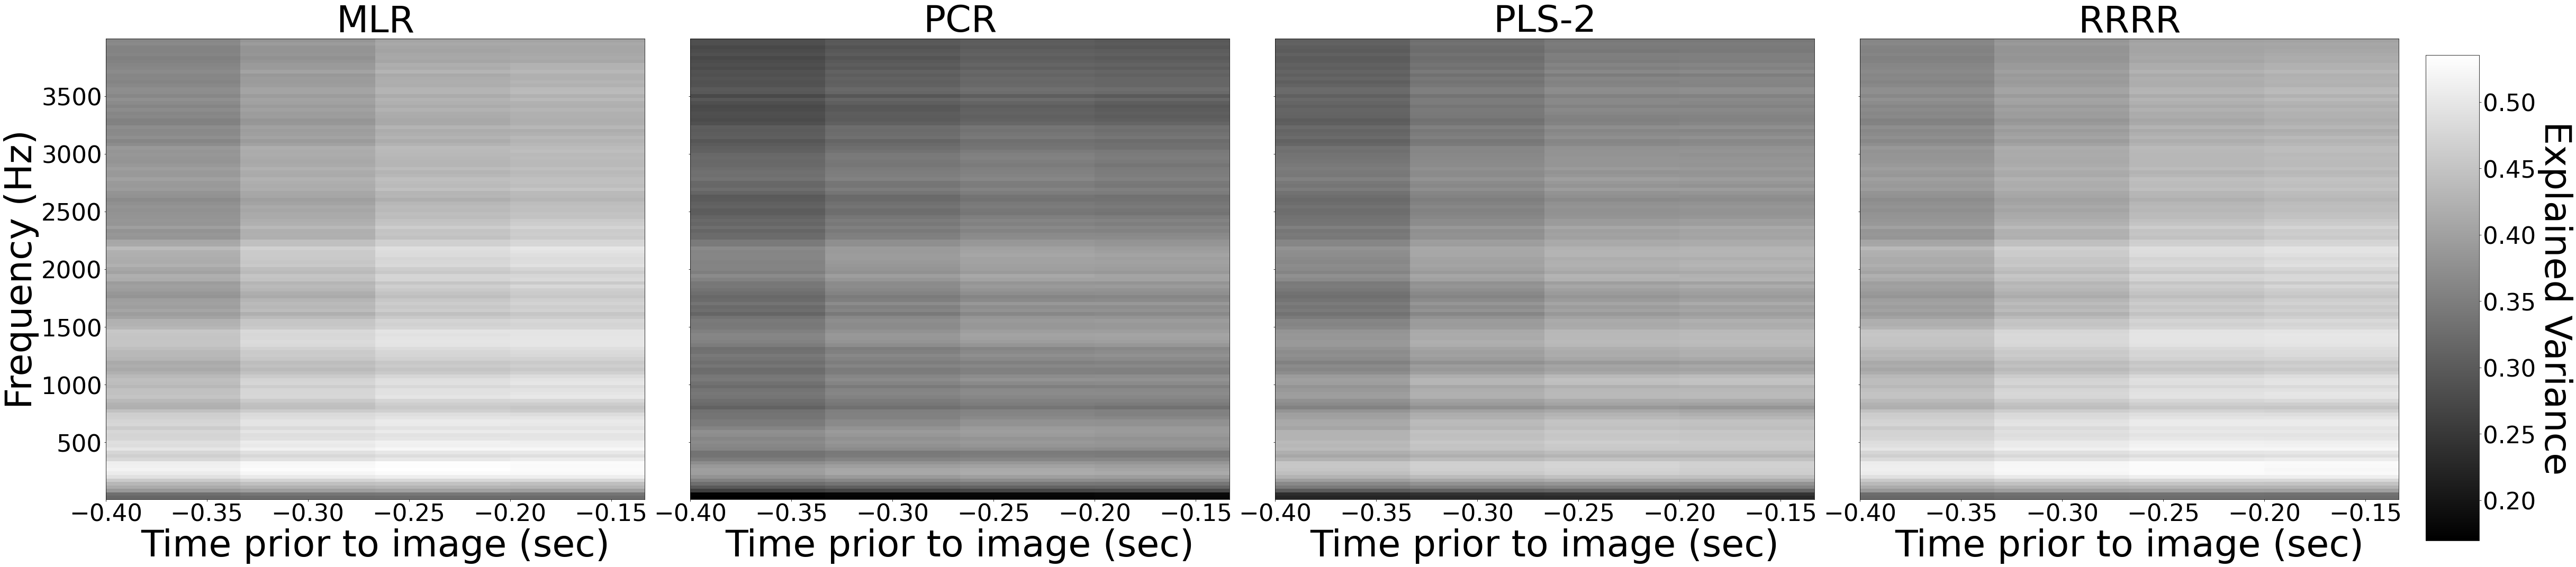

In [120]:
models = ["LR", "PCR", "PLS", "RRR"]
cv = "trial"
dataset = "complex_sub_subeset_None"
minmax_total = []
input_duration = 0.3
for m, model in enumerate(models):
    if model == "LR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridge10000.npy")[0,0,0,:,:]       
    elif model == "RRR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridge10000.npy")[0,0,5,:,:]
    else:
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridgeFalse.npy")[0,0,5,:,:]   
    average_scores = np.mean(cv_scores, axis=(0))
    minmax_total.extend([average_scores.min(), average_scores.max()])
print(minmax_total)
vmin, vmax = min(minmax_total), max(minmax_total)
fig, ax = plt.subplots(1,4,figsize=(70,15), sharey=True)
for m, model in enumerate(models):
    if model == "LR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridge10000.npy")[0,0,0,:,:]       
    elif model == "RRR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridge10000.npy")[0,0,5,:,:]
    else:
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridgeFalse.npy")[0,0,5,:,:]   
    average_scores = np.mean(cv_scores, axis=(0))
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = average_scores.reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[m].pcolormesh(offset, frequencies, spectrogram, cmap="gray", vmin=vmin, vmax=vmax,shading="auto")
    ax[m].tick_params(axis='both', which='both',labelsize=45)
    ax[m].set_title(model_dict[model], fontsize=70)
    ax[m].set_xlabel("Time prior to image (sec)", fontsize=70)
    ax[m].set_yscale("linear")
    if m == 0:
        ax[m].set_ylabel("Frequency (Hz)", fontsize=70)
fig.tight_layout()         
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.05, 0.02, 0.85])

cbar = fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=45)  
cbar.set_label('Explained Variance', rotation=270, fontsize=70, labelpad=70)
fig.savefig(f"{path}EVS_output_backward_{cv}_{input_duration}.png")   
plt.show()

# Plot EVS as function of total variance per pixel
## Forward

In [121]:
# Generate datasets for total variance
delay = 0.1
ds = 4
input_seconds = 0.3
relevance_cutoff = 0.25
tseries = [f"tseries_{i}" for i in [23, 26, 29, 32, 37]]

X_cut, Y_cut, ft_cut, frame_idx_cut, frame_trial_idx_cut = preprocessing(tseries[0], spectrograms=spectrograms,
relevance_cutoff=relevance_cutoff, input_seconds=input_seconds, ds=ds, delay=delay, mode="filtered")[2:]

for series in tseries[1:]:
    Xi_cut, Yi_cut, fti_cut, framei_idx_cut, framei_trial_idx_cut = preprocessing(series, spectrograms=spectrograms,
    relevance_cutoff=relevance_cutoff, input_seconds=input_seconds, ds=ds, delay=delay, mode="filtered")[2:]
    X_cut = np.vstack((X_cut, Xi_cut))
    Y_cut = np.vstack((Y_cut, Yi_cut))
    frame_idx_cut = np.append(frame_idx_cut, framei_idx_cut)
    frame_trial_idx_cut = np.append(frame_trial_idx_cut, framei_trial_idx_cut + frame_trial_idx_cut.max())

In [122]:
# remove invalid trials
invalid_trials = [1,2,7,9,11,13,15]
valid_trials = set(frame_trial_idx_cut).difference(invalid_trials)
valid_idx = [a for a in range(len(frame_trial_idx_cut))
             if any(frame_trial_idx_cut[a] == b for b in valid_trials)]
X_cut = X_cut[valid_idx,:]
Y_cut = Y_cut[valid_idx,:]
frame_idx_cut = frame_idx_cut[valid_idx]
frame_trial_idx_cut = frame_trial_idx_cut[valid_idx]

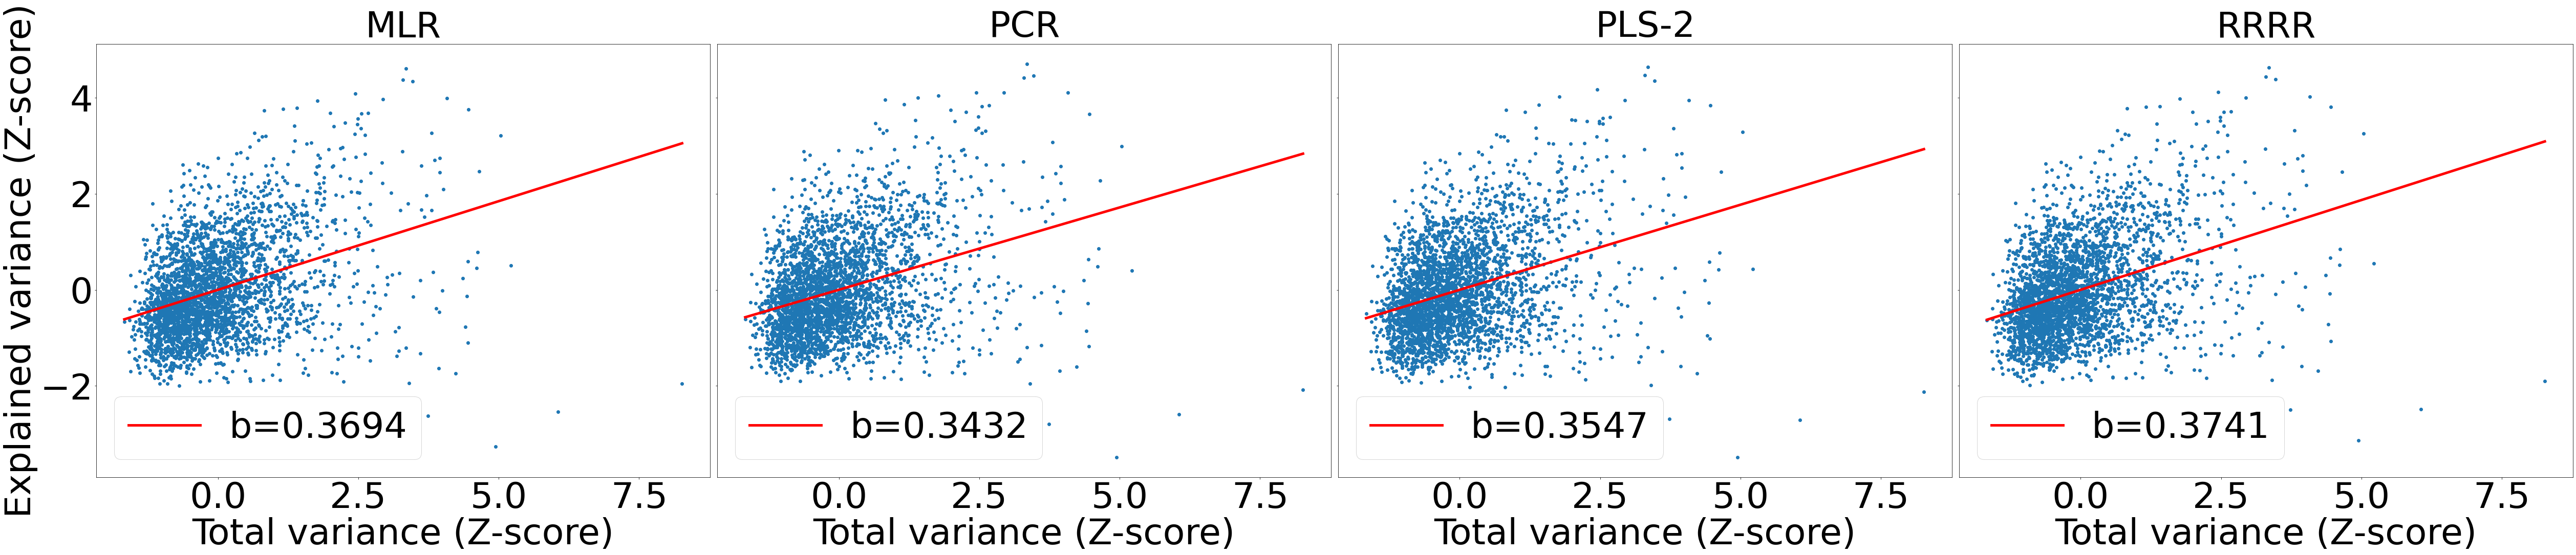

In [123]:
models = ["LR", "PCR", "PLS", "RRR"]
cv = "trial"
dataset = "complex_sub_subeset_None"

total_var = np.var(Y_cut, axis=0)

fig, ax = plt.subplots(1,4,figsize=(70,15), sharey=True)
for m, model in enumerate(models):
    if model == "LR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridge1000.npy")[0,0,0,:,:]       
    elif model == "RRR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridge1000.npy")[0,0,5,:,:]
    else:
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_False_singleFalse_evs_ridgeFalse.npy")[0,0,5,:,:]   
    average_scores = np.mean(cv_scores, axis=(0))
    x_z = StandardScaler().fit_transform(X=total_var.reshape(-1, 1))
    y_z = StandardScaler().fit_transform(X=average_scores.reshape(-1, 1))    
    ax[m].scatter(x_z, y_z)
    ax[m].tick_params(axis='both', which='both', labelsize=70)
    ax[m].set_title(model_dict[model], fontsize=70)
    ax[m].set_xlabel("Total variance (Z-score)", fontsize=70)

    slopemodel = LinearRegression().fit(x_z.reshape(-1, 1),y_z.reshape(-1, 1))
    line = np.linspace(min(x_z), max(x_z), 100)
    ax[m].plot(line, slopemodel.predict(line.reshape(-1, 1)), label=f"b={round(slopemodel.coef_[0,0],4)}", c="r", lw=5)
    ax[m].legend(prop={'size': 70})
    if m == 0:
        ax[m].set_ylabel("Explained variance (Z-score)", fontsize=70)

fig.tight_layout()         

fig.savefig(f"{path}Var_EVS_forward_{cv}.png")   
plt.show()

## Backward

In [124]:
delay = 0.1
ds = 4
input_seconds = 0.3
relevance_cutoff = 0.25
tseries = [f"tseries_{i}" for i in [23, 26, 29, 32, 37]]

X_cut, Y_cut, ft_cut, frame_idx_cut, frame_trial_idx_cut = preprocessing(tseries[0], spectrograms=spectrograms,
relevance_cutoff=relevance_cutoff, input_seconds=input_seconds, ds=ds, delay=delay, mode="filtered")[2:]

for series in tseries[1:]:
    Xi_cut, Yi_cut, fti_cut, framei_idx_cut, framei_trial_idx_cut = preprocessing(series, spectrograms=spectrograms,
    relevance_cutoff=relevance_cutoff, input_seconds=input_seconds, ds=ds, delay=delay, mode="filtered")[2:]
    X_cut = np.vstack((X_cut, Xi_cut))
    Y_cut = np.vstack((Y_cut, Yi_cut))
    frame_idx_cut = np.append(frame_idx_cut, framei_idx_cut)
    frame_trial_idx_cut = np.append(frame_trial_idx_cut, framei_trial_idx_cut + frame_trial_idx_cut.max())

invalid_trials = [1,2,7,9,11,13,15]
valid_trials = set(frame_trial_idx_cut).difference(invalid_trials)
valid_idx = [a for a in range(len(frame_trial_idx_cut))
             if any(frame_trial_idx_cut[a] == b for b in valid_trials)]
X_cut = X_cut[valid_idx,:]
Y_cut = Y_cut[valid_idx,:]
frame_idx_cut = frame_idx_cut[valid_idx]
frame_trial_idx_cut = frame_trial_idx_cut[valid_idx]

X_cut, Y_cut = Y_cut, X_cut

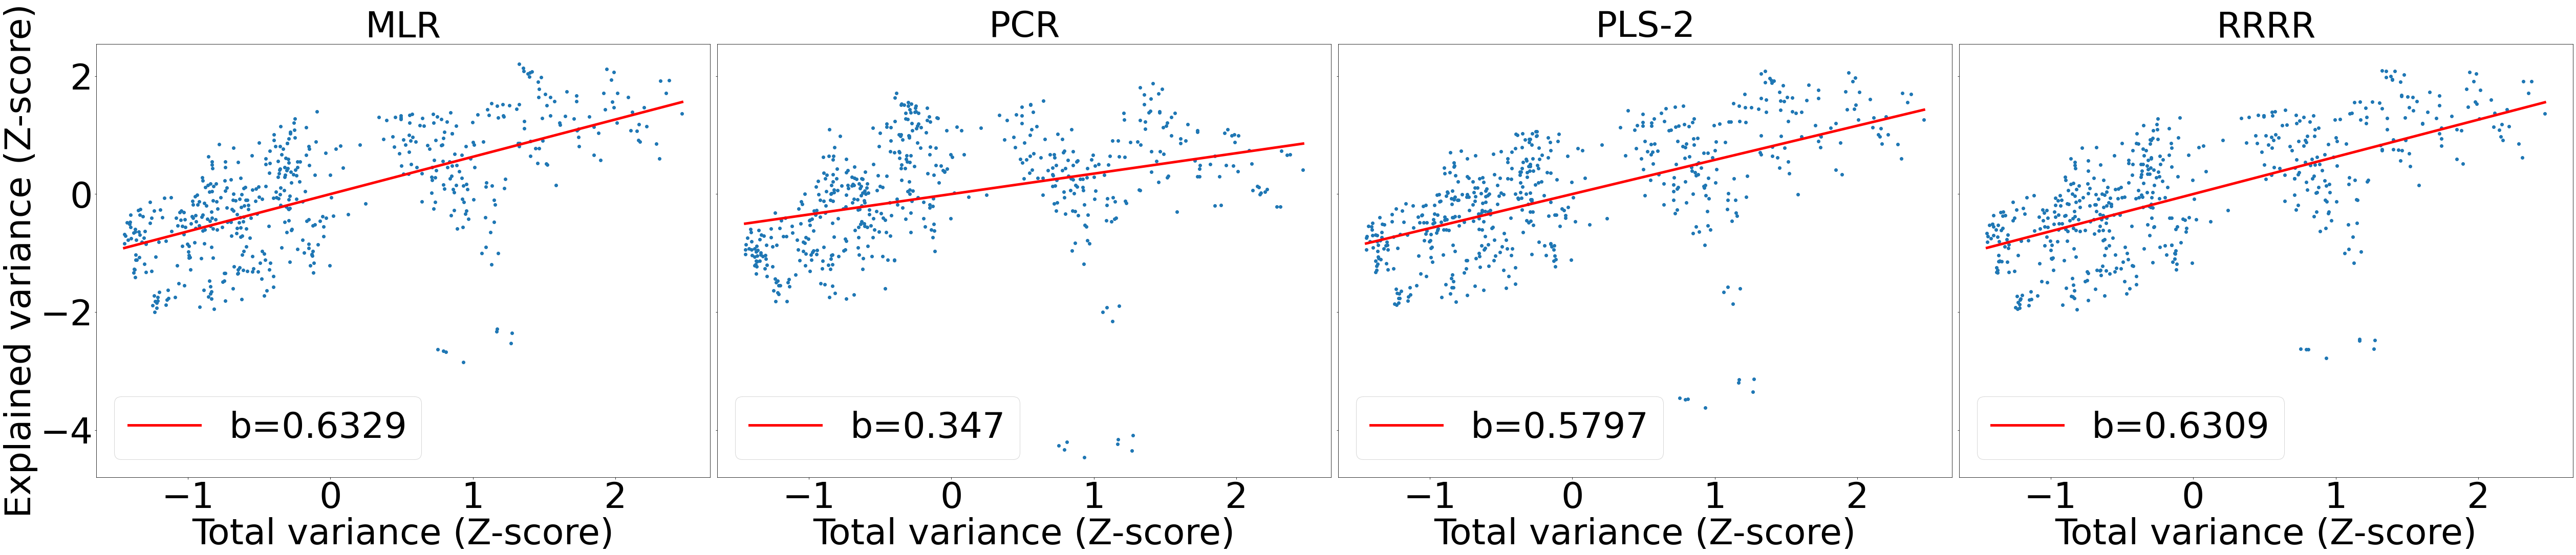

In [125]:
models = ["LR", "PCR", "PLS", "RRR"]
cv = "trial"
dataset = "complex_sub_subeset_None"
input_duration = 0.3

total_var = np.var(Y_cut, axis=0)

fig, ax = plt.subplots(1,4,figsize=(70,15), sharey=True)
for m, model in enumerate(models):
    if model == "LR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridge10000.npy")[0,0,0,:,:]       
    elif model == "RRR":
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridge10000.npy")[0,0,5,:,:]
    else:
        cv_scores = np.load(f"Linear Mapping/{model}_{dataset}_{cv}_True_singleFalse_duration[{input_duration}]_evs_ridgeFalse.npy")[0,0,5,:,:]   
    average_scores = np.mean(cv_scores, axis=(0))
    x_z = StandardScaler().fit_transform(X=total_var.reshape(-1, 1))
    y_z = StandardScaler().fit_transform(X=average_scores.reshape(-1, 1))       
    ax[m].scatter(x_z, y_z)
    ax[m].tick_params(axis='both', which='both', labelsize=70)
    ax[m].set_title(model_dict[model], fontsize=70)
    ax[m].set_xlabel("Total variance (Z-score)", fontsize=70)
    slopemodel = LinearRegression().fit(x_z.reshape(-1, 1),y_z.reshape(-1, 1))
    line = np.linspace(min(x_z), max(x_z), 100)
    ax[m].plot(line, slopemodel.predict(line.reshape(-1, 1)), label=f"b={round(slopemodel.coef_[0,0],4)}", c="r", lw=5)
    ax[m].legend(prop={'size': 70},loc=3)
    if m == 0:
        ax[m].set_ylabel("Explained variance (Z-score)", fontsize=70)

fig.tight_layout()         

fig.savefig(f"{path}Var_EVS_backward_{cv}_{input_duration}.png")   
plt.show()

## Qualitative Results
### Predictions

In [136]:
# Generate Datasets
delay = 0.1
ds = 4
input_seconds = 0.3
relevance_cutoff = 0.25
reverse_direction = False
tseries = [f"tseries_{i}" for i in [23, 26, 29, 32, 37]]

X_cut, Y_cut, ft_cut, frame_idx_cut, frame_trial_idx_cut = preprocessing(tseries[0], spectrograms=spectrograms,
relevance_cutoff=relevance_cutoff, input_seconds=input_seconds, ds=ds, delay=delay, mode="filtered")[2:]

for series in tseries[1:]:
    Xi_cut, Yi_cut, fti_cut, framei_idx_cut, framei_trial_idx_cut = preprocessing(series, spectrograms=spectrograms,
    relevance_cutoff=relevance_cutoff, input_seconds=input_seconds, ds=ds, delay=delay, mode="filtered")[2:]
    X_cut = np.vstack((X_cut, Xi_cut))
    Y_cut = np.vstack((Y_cut, Yi_cut))
    frame_idx_cut = np.append(frame_idx_cut, framei_idx_cut)
    frame_trial_idx_cut = np.append(frame_trial_idx_cut, framei_trial_idx_cut + frame_trial_idx_cut.max())

invalid_trials = [1,2,7,9,11,13,15]
valid_trials = set(frame_trial_idx_cut).difference(invalid_trials)
valid_idx = [a for a in range(len(frame_trial_idx_cut))
             if any(frame_trial_idx_cut[a] == b for b in valid_trials)]

X_cut = X_cut[valid_idx,:]
Y_cut = Y_cut[valid_idx,:]
frame_idx_cut = frame_idx_cut[valid_idx]
frame_trial_idx_cut = frame_trial_idx_cut[valid_idx]

overall_idx = np.arange(X_cut.shape[0])

if reverse_direction:
    X_cut, Y_cut = Y_cut, X_cut

## New Stimulus CV

In [134]:
from preprocessing_3 import cv_split_newstim
temp = os.listdir("temp/")
for file_ in temp:
    os.remove(f"temp/{file_}")


splits_X, splits_Y, test_sets, idx_per_set = cv_split_newstim(X_cut, Y_cut, frame_idx_cut, frame_trial_idx_cut,
                                    index_set=None,
                                    mode="drive", 
                                    reverse_direction=reverse_direction,
                                    give_indices=True)

[ -7.38231184  -7.69714415  -7.32981825  -4.54394362  -6.57221947
 -11.96369862   0.16091946  -9.56718578 -10.45167746  -3.6921764
 -14.12936882  -7.15860777  -1.57018375 -13.39112158  -1.55141479
  -1.27037526 -12.27162302 -10.18478384   1.64095917  -5.63194754
  -8.66093158  -0.50896469  -0.84925757  -9.22738292  -9.56027282
 -18.54783712 -12.63300997 -17.29015156 -16.75908022  -9.84861888
 -13.87359554 -12.17436524]
---------------
[41.94481279 39.08389556 40.17405015 38.7117155  46.29690221 43.94776658
 38.1549603  34.57369146 37.04499518 37.62076914 33.24851272 44.32622567
 43.03716627 36.5764725  38.86433989 38.58186132 39.02403968 39.88829279
 41.19083083 41.40436717 35.21788333 40.79070149 41.42422587 36.42301316
 36.27466822 38.06789114 39.39873074 41.72623481 39.37109011 38.86319007
 40.93321801 44.00794407 39.09892554 39.87512387 41.66875279 38.75492121
 42.77957588 41.40159926 44.03312286 43.65466742 39.08387199 34.76572491
 29.59005388 41.26740793 35.08339516 41.22084078 4

[25.4950141  25.430388   28.06897272 38.12654634 40.18168525 38.40062516
 11.82944112 15.86267589 18.76951527 18.40149023 19.15106256 23.77226594
 20.93303936 14.42888083 18.03956329 21.43856495 26.48636373 16.52268125
 23.7617376  23.8386364  28.73319431 28.90763124 25.05724763 29.72575334]
---------------
[32.30587485 31.9011011  32.5565928  32.01816436 31.97389838 32.10878681
 32.39944218 32.29910772 32.15704673 32.118929   32.40975379 32.2793981
 32.62603414 32.54192555 32.16718287 32.32498761 32.21141024 32.03060091
 32.00788399 32.08539632 31.97759477 32.0301485  31.80378583 31.99540456
 31.61197482 32.04050628 32.05803899 31.89729652 31.81234122 32.03896801
 31.93986383 31.5625285  30.18972392 29.39116827 26.59428965 24.54460847]
---------------
[-15.61920584  -0.37746223   0.02928267   3.2989659    3.10163134
   1.26828669   0.42460002   6.035851     8.73587615  -0.86031905
  -0.3454446    6.95917931   5.57241192   2.88527677  -2.43908988
   1.70819241   7.41145002   7.33839936

[16.49473041 11.20284784 15.98486068 12.32341375 13.58322821 10.09351283
 14.23046023 15.7930376  10.53001217  6.81638078 10.75409169 14.87651283
 19.67543385  7.52860323 16.42347192 12.83594219 11.07996424 15.57462941
  8.17928877]
---------------
[ 5.07819183 15.67592302 19.73078961 18.53334244 13.86898506 15.51826995
 15.72521844 13.20211352 12.60302145 23.148317   19.95618694 16.27923557
 14.59619293 15.43046695  8.61192167 13.0251059  12.39577649 12.08135431
 17.9528646  19.11599794 15.48281642 17.66091016 12.537034   13.55728439
 16.05092945 13.05220963  9.60795651  7.46591437  6.45727507 10.64684741
  6.88928257 11.57599959 12.62004257 14.54353384 15.14861612 17.07371001]
---------------
[15.24084194 11.34624347]
---------------
[-42.34920411 -30.62104826 -18.95877508 -25.803187   -32.35400548
 -29.74924317 -31.68435739 -33.34010471 -30.24260171 -32.48879468
 -29.12794395 -30.48621823 -33.66775278 -11.83078895 -23.35726205
 -27.87672758 -31.30481394 -32.48187948 -29.28361248 -33

In [119]:
idx_per_set = np.array(idx_per_set)

131
36
[ 0.66377893  0.61901159  0.44229789  0.25770196  0.25733478  0.35547588
  0.43163325  0.48340698  0.60512658  0.64922353  0.69063446  0.7264074
  0.70969276  0.72202788  0.74010991  0.73686151  0.74352813  0.75750357
  0.63692637  0.61070425  0.67446787  0.6595348   0.78837219  0.80157928
  0.64493062  0.00754593  0.41115187  0.67957452  0.79692853  0.83572701
  0.82828607  0.79086478  0.7315781   0.53563971  0.23784845  0.01615312
 -0.15754749 -0.2063892  -0.11330168 -0.00500092  0.06714624  0.11382275
  0.12835832  0.10850036  0.03330208 -0.02153387 -0.02764036  0.00612773
  0.08762534  0.37137637  0.70373588  0.7820061   0.77951704  0.76858038
  0.7568207   0.74532591  0.73843511  0.72977731  0.71856117  0.71716031
  0.73844797  0.74771548  0.77450777  0.77633164  0.77101824  0.75996088
  0.70343087  0.62075738  0.51190667  0.41354259  0.39514354  0.3516938
  0.29621773  0.23909481  0.10937701 -0.02168975 -0.07558132 -0.10475574
 -0.21636781 -0.29067436 -0.31755895 -0.359402

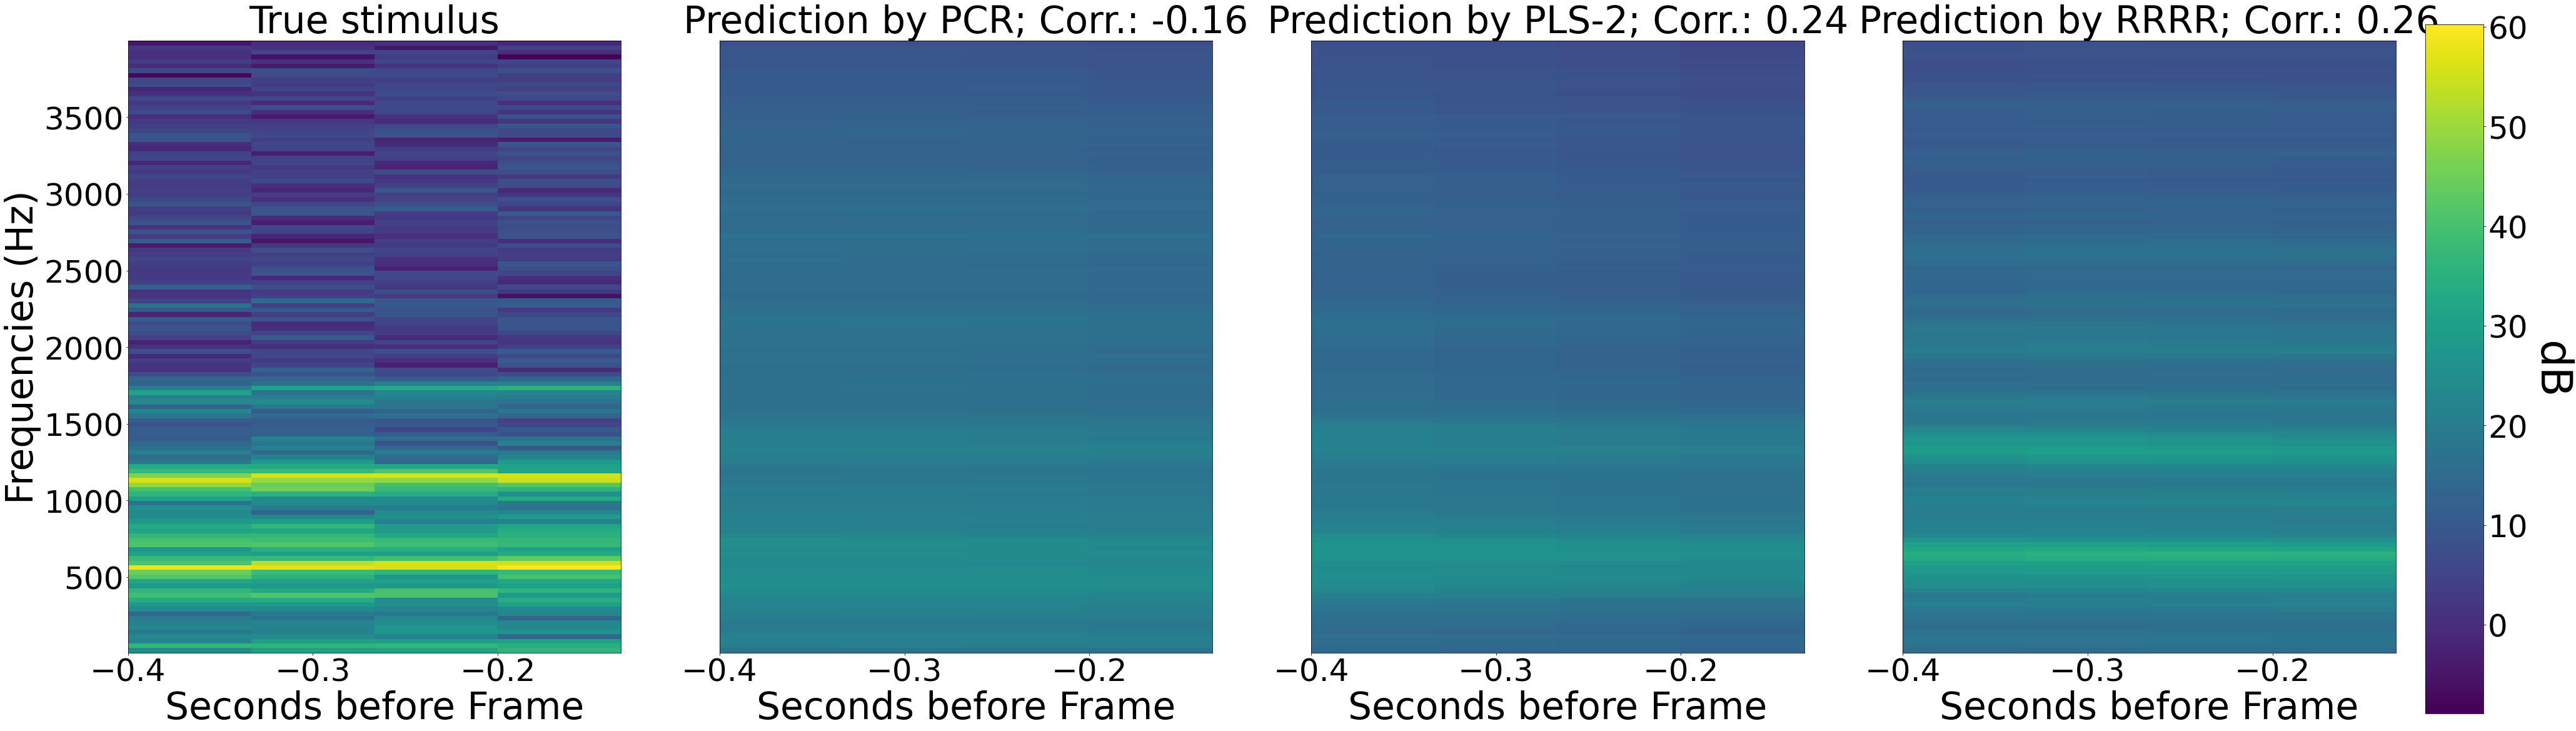

In [135]:
# We define RRR again to use the components
class RRR():
    def __init__(self, ridge=False):
        self.ridge = ridge


    def fit(self, X, Y):
        U,s,V = np.linalg.svd(X, full_matrices=False)
        if self.ridge != False:
            self.B = V.T @ np.linalg.inv(np.diag(s**2) + self.ridge * np.identity(s.shape[0])) @ np.diag(s) @ U.T @ Y

        elif self.ridge == False:
            self.B = V.T @ np.diag(s/(s**2)) @ U.T @ Y

        self.U,self.s,self.V = np.linalg.svd(X@self.B, full_matrices=False)


    def predict(self, X, rank):
        w = self.B @ self.V.T[:,:rank]
        v = self.V.T[:,:rank]

        pos = np.argmax(np.abs(v), axis=0)
        flips = np.sign(v[pos, range(v.shape[1])])
        v = v * flips
        w = w * flips
        return X @ w @ v.T

def run_prediction(method,X_train, Y_train,Y_test,X_scaler,frameInSplit):
    """Return the predicted frame depending on the model (method)"""
    if method == "CCA":
        model = CCAEdited(n_components=min(max_components, X_train.shape[1]),scale=False)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
    if method == "PLS":
        model = PLSRegressionEdited(n_components=min(max_components, X_train.shape[1]),scale=False)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
    if method == "RRR":
        model = RRR(ridge=ridge)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))


    if method == "PCR":
        model = model = make_pipeline(PCA(n_components=rank), LinearRegression())
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
        Y_pred = model.predict(X_scaler.transform(X_test))
    elif method == "LR":
        model = Ridge(alpha=ridge)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
        Y_pred = model.predict(X_scaler.transform(X_test))
    elif method in ["CCA","PLS", "RRR"]:    
        Y_pred = model.predict(X_scaler.transform(X_test), rank=rank)

    correlation = diag_pear_coef = np.array([pearsonr(Y_test[i, :], Y_pred[i, :])[0] for i in range(Y_test.shape[0])])
    print(correlation)
    print("min : ", correlation.min(), "at", np.argmin(correlation))
    print("median : ", np.sort(correlation)[len(correlation)//2], "at", np.argsort(correlation)[len(correlation)//2])
    print("max : ", correlation.max(), "at", np.argmax(correlation))
    print(correlation[frameInSplit])  
    y_pred =  Y_scaler.inverse_transform(Y_pred)[frameInSplit]
    
    return (y_pred.flatten(), round(correlation[frameInSplit], 2))

# Select the frame from the CV splits, plot ground truth and predictions by each model
path = "Document Plots/"
trial = frame_trial_idx_cut[0]
models = ["PCR", "PLS", "RRR"]
split = 8
stim = 98 
frame = 10

rank = 25
max_components=rank

stimframes = np.where(np.array(idx_per_set[split]) == stim)[0][frame]

print(len(np.where(np.array(idx_per_set[split]) == stim)[0]))
frameInSplit = np.where(np.array(idx_per_set[split]) == stim)[0][frame]
print(frameInSplit)
reverse_direction = True
if reverse_direction == True:
    ridge = 10000
elif reverse_direction == False:
    ridge = 1000
ds=4
relevance_cutoff=0.25

X_train = np.load(splits_X[split][0])
X_test = np.load(splits_X[split][1])

Y_train = np.load(splits_Y[split][0])
Y_test = np.load(splits_Y[split][1])

X_scaler = StandardScaler().fit(X_train)
Y_scaler = StandardScaler().fit(Y_train)

y_true = Y_test[frameInSplit,:].flatten()

x_true = Y_test[frameInSplit,:].flatten()
fig, ax = plt.subplots(1, 4, figsize=(65,18))
vmin, vmax = np.min(y_true), np.max(y_true)
if reverse_direction == True:
    #fig.suptitle(f"Stimulus: {stim}, Frame: {frame}", fontsize=70)
    offset = np.array([-(int(round(input_seconds* 15,1))-j) /15 for j in range(int(round(input_seconds* 15,1)))]) -0.1
    frequencies = spectrograms[1][1]
    spectrogram = y_true.reshape(len(spectrograms[0][1]),int(round(input_seconds* 15,1)))
    im = ax[0].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    ax[0].set_title(f"True stimulus", fontsize=60)
    ax[0].set_ylabel('Frequencies (Hz)')
    ax[0].set_xlabel("Seconds before Frame")
    ax[0].xaxis.label.set_size(60)
    ax[0].yaxis.label.set_size(60)
    ax[0].tick_params(axis='both', which='major', labelsize=50)
    #fig.tight_layout()
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.05, 0.02, 0.85])

    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=50)  
    cbar.set_label('dB', rotation=270, fontsize=70, labelpad=70)
    for m, model in enumerate(models):
        prediction = run_prediction(model, X_train, Y_train, Y_test, X_scaler, frameInSplit)                               
        spectrogram = prediction[0].reshape(len(spectrograms[0][1]),int(round(input_seconds* 15,1)))

        im = ax[m+1].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
        if model == "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=60)
        elif model != "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=60)
        ax[m+1].set_xlabel("Seconds before Frame")
        ax[m+1].xaxis.label.set_size(60)
        ax[m+1].yaxis.label.set_size(60)
        ax[m+1].tick_params(axis='both', which='both', left=False,labelleft=False,labelsize=50)



    fig.savefig(f"{path}{reverse_direction}_newstim_{stim}_{frame}_Activity_vs_Prediction_PCR.png")
    plt.show()

elif reverse_direction == False:
    
    #fig.suptitle(f"Stimulus: {stim}, Frame: {frame}", fontsize=70)
    print(y_true.shape)
    im = ax[0].imshow(reverse_preprocessing_img(np.array([y_true, y_true]),relevance_cutoff=relevance_cutoff, ds=ds)[0], cmap="binary", vmin=vmin, vmax=vmax)
    ax[0].set_title(f"True activity", fontsize=60)
    ax[0].tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)
     
    for m, model in enumerate(models):
        prediction = run_prediction(model, X_train, Y_train, Y_test, X_scaler, frameInSplit)
        #print(mean_prediction.shape)
        im = ax[m+1].imshow(reverse_preprocessing_img(np.array([prediction[0], prediction[0]]),relevance_cutoff=relevance_cutoff, ds=ds)[0], cmap="binary", vmin=vmin, vmax=vmax)
        if model == "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=60)
        elif model != "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=60)
        ax[m+1].tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)

    fig.tight_layout()         
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])

    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=50)  
    cbar.set_label('Arbitrary Unit', rotation=270, fontsize=70, labelpad=70)
    
    fig.savefig(f"{path}{reverse_direction}_newstim_{stim}_{frame}_Activity_vs_Prediction_PCR.png")
    plt.show()

## Trial CV

In [139]:
from preprocessing_3 import cv_split_trial
temp = os.listdir("temp/")
for file_ in temp:
    os.remove(f"temp/{file_}")

splits_X, splits_Y, splits_overall = cv_split_trial(X_cut, Y_cut, frame_trial_idx_cut,
                                        index_set=None,
                                        overall_idx=overall_idx, mode="drive")


    


131.0
(array([242], dtype=int64),)
(3072,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 62491.58it/s]


(2, 5360) (5360,)
[0.23879966 0.2629391  0.22751043 ... 0.38396421 0.41325613 0.40455833]
min :  -0.2779020548992 at 212
median :  0.2518052231294605 at 1204
max :  0.6550687234068582 at 278
[0.39005378]


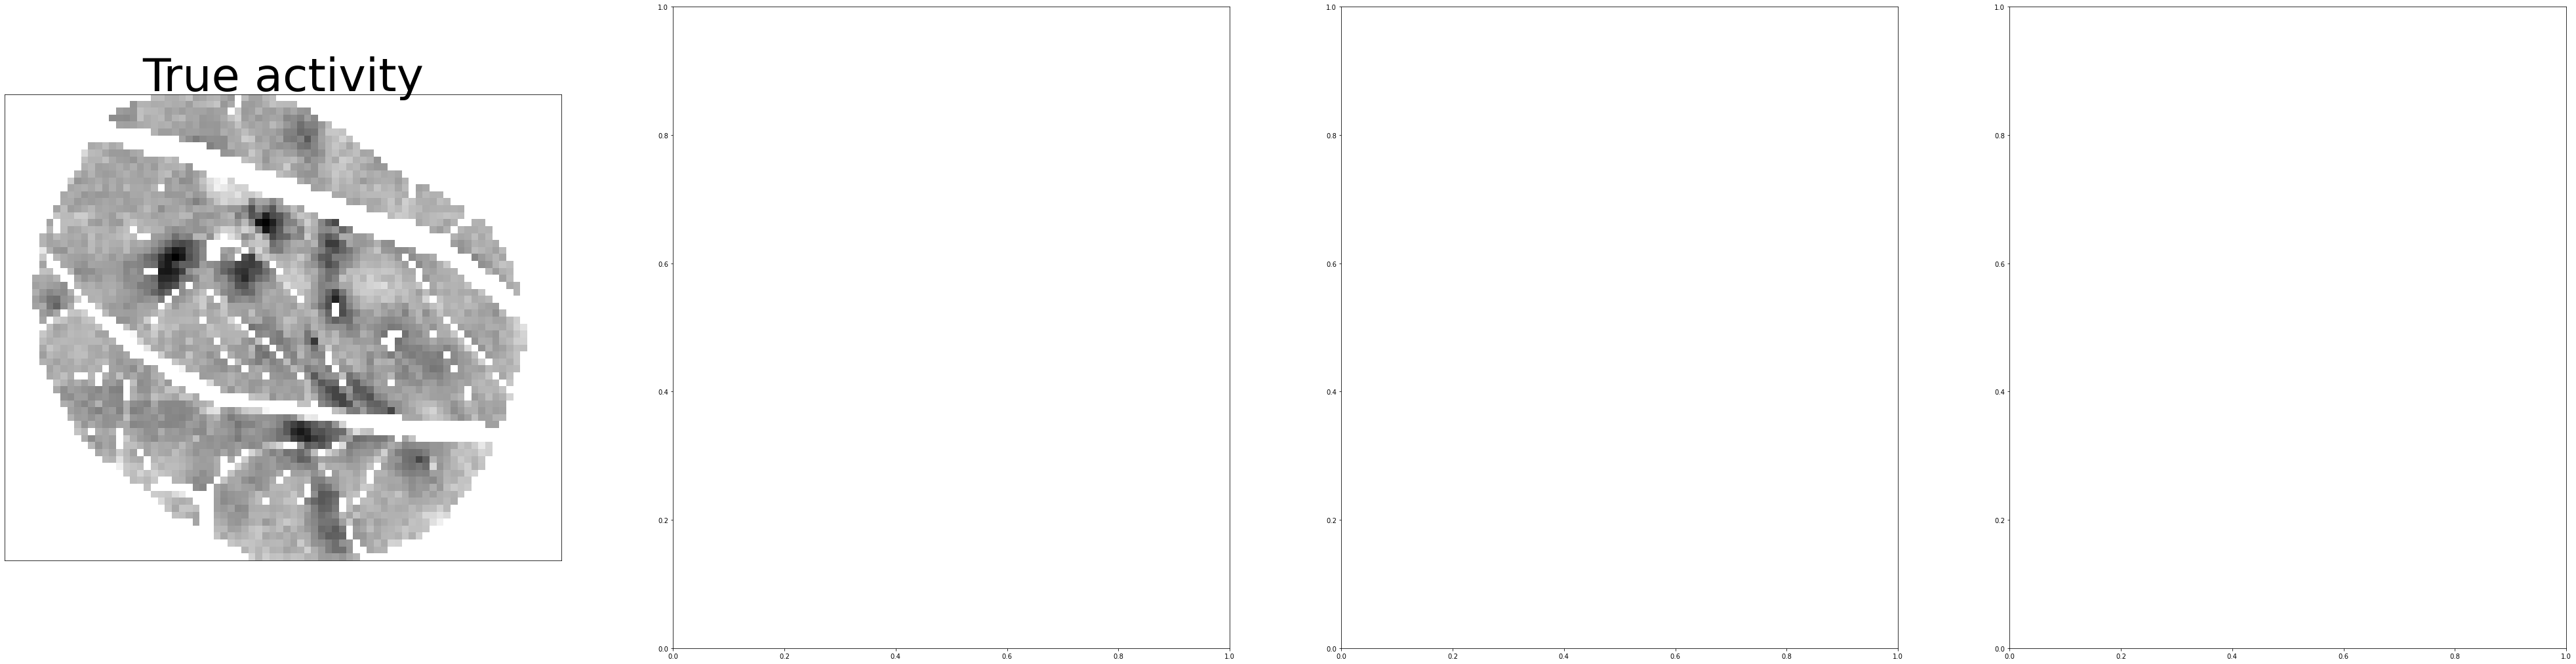

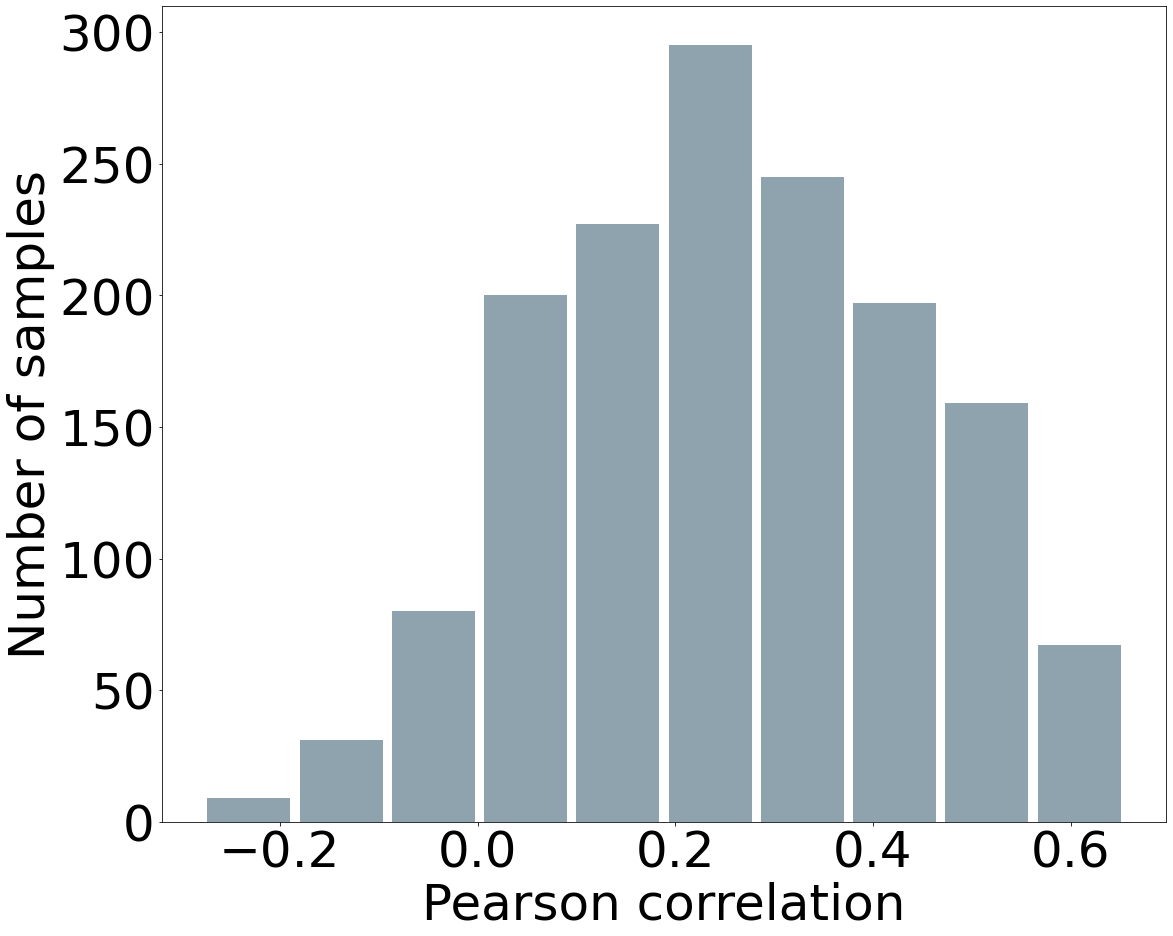

100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 82683.77it/s]


(2, 5360) (5360,)
[0.21849881 0.22603793 0.19640917 ... 0.43662319 0.45532789 0.45096768]
min :  -0.27345107689378534 at 129
median :  0.26743824874616895 at 1356
max :  0.7471258940936639 at 1380
[0.45854289]


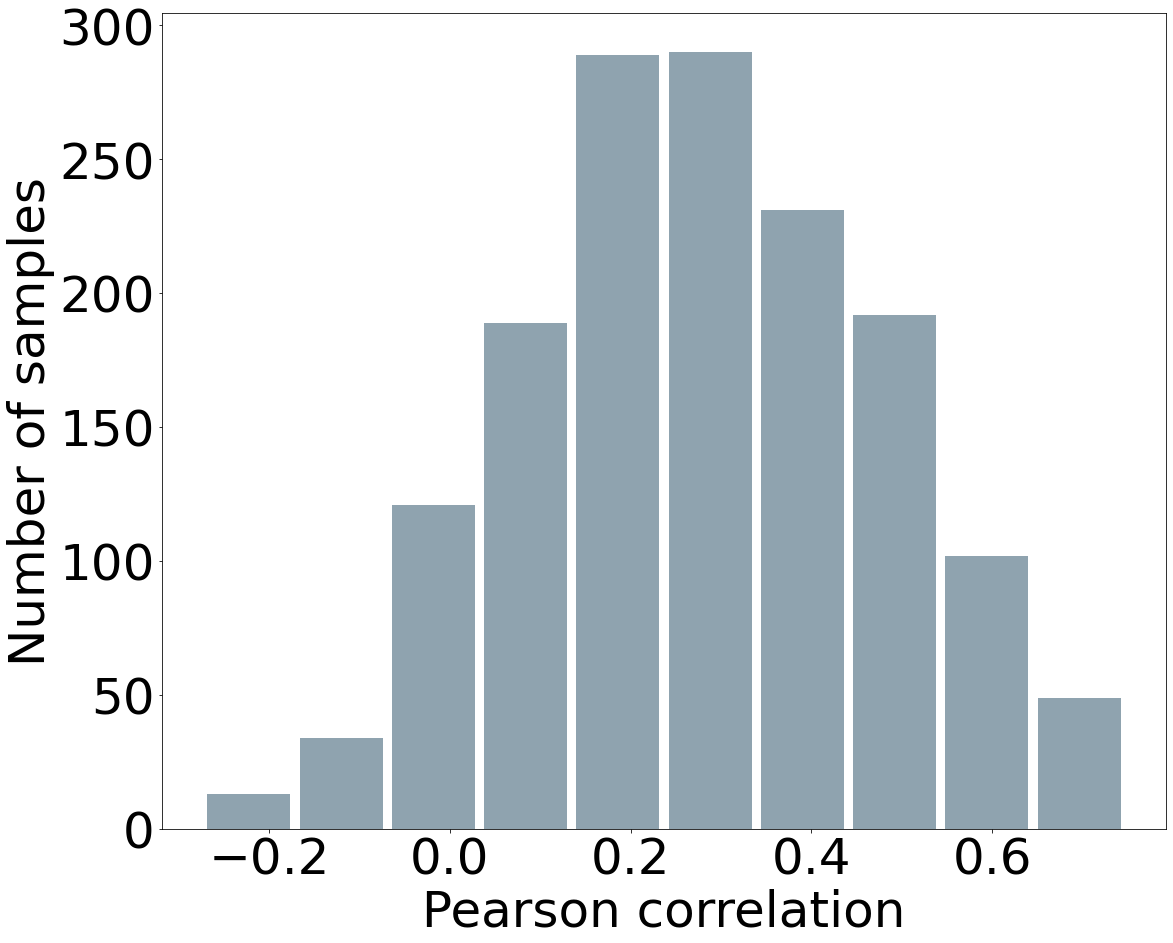

100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 68879.16it/s]


(2, 5360) (5360,)
[0.21611065 0.25543372 0.23956239 ... 0.36834349 0.41955548 0.41347363]
min :  -0.20214963095053942 at 129
median :  0.30096650726558355 at 184
max :  0.7394623328635024 at 1165
[0.51103591]


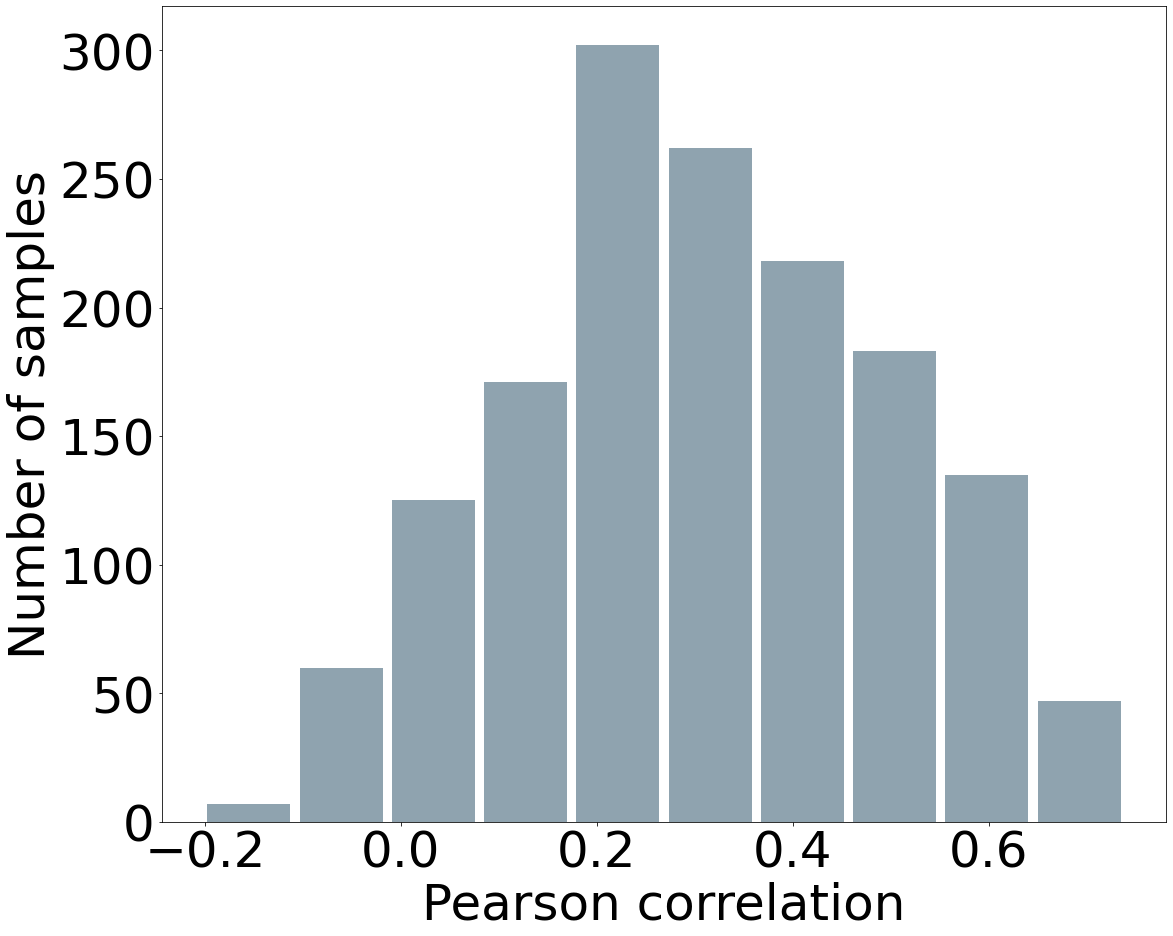

100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 87377.26it/s]


(2, 5360) (5360,)


In [144]:
# Everything as above but selection of the frame to be plotted is different in this CV_mode
class RRR():
    def __init__(self, ridge=False):
        self.ridge = ridge


    def fit(self, X, Y):
        U,s,V = np.linalg.svd(X, full_matrices=False)
        if self.ridge != False:
            self.B = V.T @ np.linalg.inv(np.diag(s**2) + self.ridge * np.identity(s.shape[0])) @ np.diag(s) @ U.T @ Y

        elif self.ridge == False:
            self.B = V.T @ np.diag(s/(s**2)) @ U.T @ Y

        self.U,self.s,self.V = np.linalg.svd(X@self.B, full_matrices=False)


    def predict(self, X, rank):
        w = self.B @ self.V.T[:,:rank]
        v = self.V.T[:,:rank]

        pos = np.argmax(np.abs(v), axis=0)
        flips = np.sign(v[pos, range(v.shape[1])])
        v = v * flips
        w = w * flips
        return X @ w @ v.T

trial = frame_trial_idx_cut[0]
models = ["PCR", "PLS", "RRR"]
split = 0
stim = 98#98 #51, 158, 98
frame = 10

rank = 25
max_components=rank
stimframes = overall_idx[np.where(frame_idx_cut == stim)][frame]
print(len(overall_idx[np.where(frame_idx_cut == stim)]) / 8)
frameInSplit = np.where(splits_overall[split][1] == stimframes)
#frameInSplit = 129
print(frameInSplit)
reverse_direction = False
if reverse_direction == True:
    ridge = 10000
elif reverse_direction == False:
    ridge = 1000
ds=4
relevance_cutoff=0.25

X_train = np.load(splits_X[split][0])
X_test = np.load(splits_X[split][1])

Y_train = np.load(splits_Y[split][0])
Y_test = np.load(splits_Y[split][1])

X_scaler = StandardScaler().fit(X_train)
Y_scaler = StandardScaler().fit(Y_train)

y_true = Y_test[frameInSplit].flatten()

def run_prediction(method,X_train, Y_train,Y_test,X_scaler,frameInSplit):
    """Predict the frame in the given CV-fold and plot histogram of correlations between true and predicted
    images"""
    if method == "CCA":
        model = CCAEdited(n_components=min(max_components, X_train.shape[1]),scale=False)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
    if method == "PLS":
        model = PLSRegressionEdited(n_components=min(max_components, X_train.shape[1]),scale=False)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
    if method == "RRR":
        model = RRR(ridge=ridge)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))


    if method == "PCR":
        model = model = make_pipeline(PCA(n_components=rank), LinearRegression())
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
        Y_pred = model.predict(X_scaler.transform(X_test))
    elif method == "LR":
        model = Ridge(alpha=ridge)
        model.fit(X_scaler.transform(X_train), Y_scaler.transform(Y_train))
        Y_pred = model.predict(X_scaler.transform(X_test))
    elif method in ["CCA","PLS", "RRR"]:    
        Y_pred = model.predict(X_scaler.transform(X_test), rank=rank)
   
    correlation = diag_pear_coef = np.array([pearsonr(Y_test[i, :], Y_pred[i, :])[0] for i in range(Y_test.shape[0])])
    print(correlation)
    print("min : ", correlation.min(), "at", np.argmin(correlation))
    print("median : ", np.sort(correlation)[len(correlation)//2], "at", np.argsort(correlation)[len(correlation)//2])
    print("max : ", correlation.max(), "at", np.argmax(correlation))
    print(correlation[frameInSplit])
    fig2, ax2 = plt.subplots(1,1,figsize=(18,15))
    ax2.hist(correlation, color='#607c8e', alpha=0.7,  rwidth=0.9)
    #ax2.set_ylim([0,14])                   
    ax2.set_xlabel("Pearson correlation", fontsize=50)
    ax2.set_ylabel("Number of samples", fontsize=50)
    ax2.tick_params(axis='both', which='major', labelsize=50)
    plt.show()
    #fig2.savefig(f"Document Plots/predtrue_correlations_forward_{method}.png") 
    
    y_pred =  Y_scaler.inverse_transform(Y_pred)[frameInSplit]
    
    return (y_pred.flatten(), round(correlation[frameInSplit][0], 2))
    
fig, ax = plt.subplots(1, 4, figsize=(70,18))
vmin, vmax = np.min(y_true), np.max(y_true)
if reverse_direction == True:
    #fig.suptitle(f"Stimulus: {stim}, Frame: {frame}", fontsize=70)
    offset = np.array([-(int(round(input_seconds* 15,1))-j) /15 for j in range(int(round(input_seconds* 15,1)))]) -0.1
    frequencies = spectrograms[1][1]
    spectrogram = y_true.reshape(len(spectrograms[0][1]),int(round(input_seconds* 15,1)))
    im = ax[0].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    ax[0].set_title(f"True stimulus", fontsize=60)
    cbar.ax.tick_params(labelsize=50)
    ax[0].set_ylabel('Frequencies (Hz)')
    ax[0].set_xlabel("Seconds before Frame")
    ax[0].xaxis.label.set_size(60)
    ax[0].yaxis.label.set_size(60)
    ax[0].tick_params(axis='both', which='major', labelsize=50)
    #fig.tight_layout()
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.05, 0.02, 0.85])

    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=50)  
    cbar.set_label('dB', rotation=270, fontsize=70, labelpad=70)
    for m, model in enumerate(models):
        prediction = run_prediction(model, X_train, Y_train, Y_test, X_scaler, frameInSplit)                               
        spectrogram = prediction[0].reshape(len(spectrograms[0][1]),int(round(input_seconds* 15,1)))

        im = ax[m+1].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
        if model == "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=60)
        elif model != "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=60)
        ax[m+1].set_xlabel("Seconds before Frame")
        ax[m+1].xaxis.label.set_size(60)
        ax[m+1].yaxis.label.set_size(60)
        ax[m+1].tick_params(axis='both', which='both', left=False,labelleft=False,labelsize=50)

    
    
    fig.savefig(f"{path}{reverse_direction}_trial_{stim}_{frame}_Activity_vs_Prediction_PCR.png")
    plt.show()

elif reverse_direction == False:
    #fig.suptitle(f"Stimulus: {stim}, Frame: {frame}", fontsize=70)
    print(y_true.shape)
    im = ax[0].imshow(reverse_preprocessing_img(np.array([y_true, y_true]),relevance_cutoff=relevance_cutoff, ds=ds)[0], cmap="binary", vmin=vmin, vmax=vmax)
    ax[0].set_title(f"True activity", fontsize=70)
    ax[0].tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)
    for m, model in enumerate(models):
        prediction = run_prediction(model, X_train, Y_train, Y_test, X_scaler, frameInSplit)
        #print(mean_prediction.shape)
        im = ax[m+1].imshow(reverse_preprocessing_img(np.array([prediction[0], prediction[0]]),relevance_cutoff=relevance_cutoff, ds=ds)[0], cmap="binary", vmin=vmin, vmax=vmax)
        if model == "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=70)
        elif model != "LR":
            ax[m+1].set_title(f"Prediction by {model_dict[model]}; Corr.: {prediction[1]}", fontsize=70)
        ax[m+1].tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)
    
    fig.tight_layout()         
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])

    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=50)  
    cbar.set_label('Arbitrary Unit', rotation=270, fontsize=70, labelpad=70)


    
    

    
    fig.savefig(f"{path}{reverse_direction}_trial_{stim}_{frame}_Activity_vs_Prediction_PCR.png")
    plt.show()

# Top 10 Components plotted for each model

### PLS Reg

(532, 100) (3072, 100)
(532, 10)


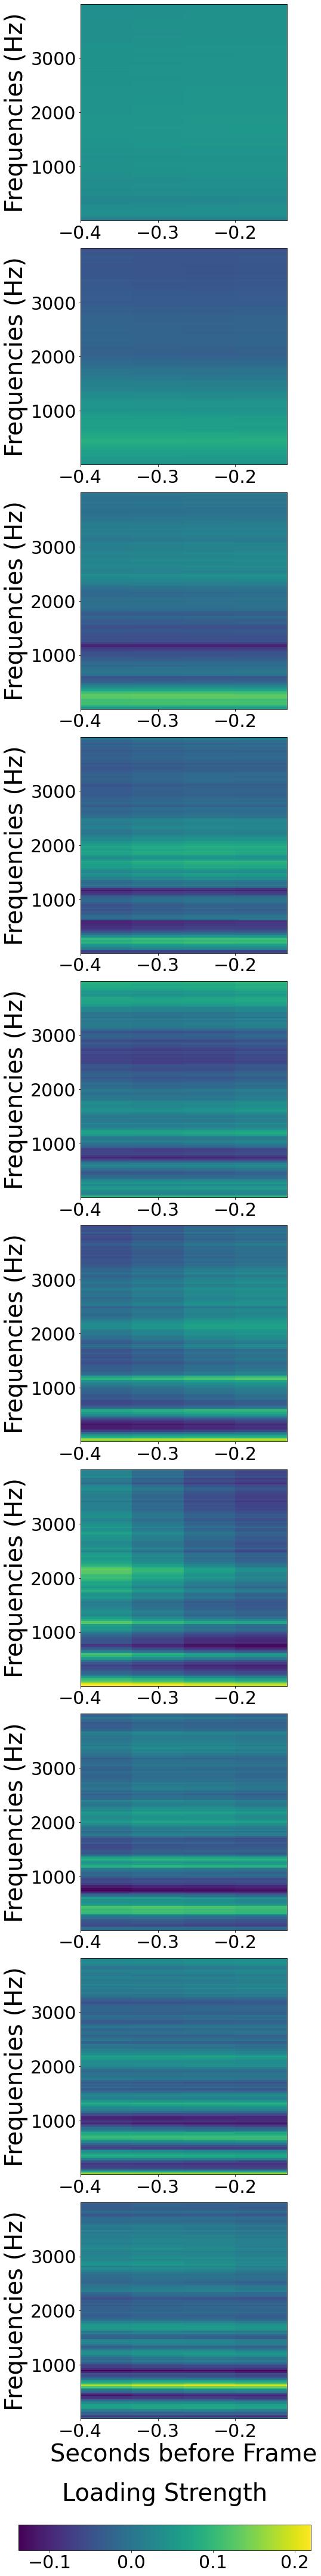

In [113]:
# Forward, Input Domain

path = "Document Plots/"
direction = "forward"
input_duration = 0.3
model = pickle.load(open("Linear Mapping/PLS_complex_sub_subeset_None_trial_delay0.1_duration0.3_False_singleFalse_ridgeFalse.p", "rb"))
model_components = [model.x_rotations_, model.y_loadings_]

print(model_components[0].shape, model_components[1].shape)
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = model_components[0][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    
    ax[c].set_ylabel('Frequencies (Hz)')
    if c == 9:
        ax[c].set_xlabel("Seconds before Frame")
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_pls_xloadings10_complex_sub_cfix_trial.png")
plt.show()

(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 51183.82it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 52178.25it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61073.86it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57172.02it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 45545.28it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 54286.02it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 47141.04it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 49761.32it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 50630.75it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 56227.29it/s]


(10, 5360) (5360,)


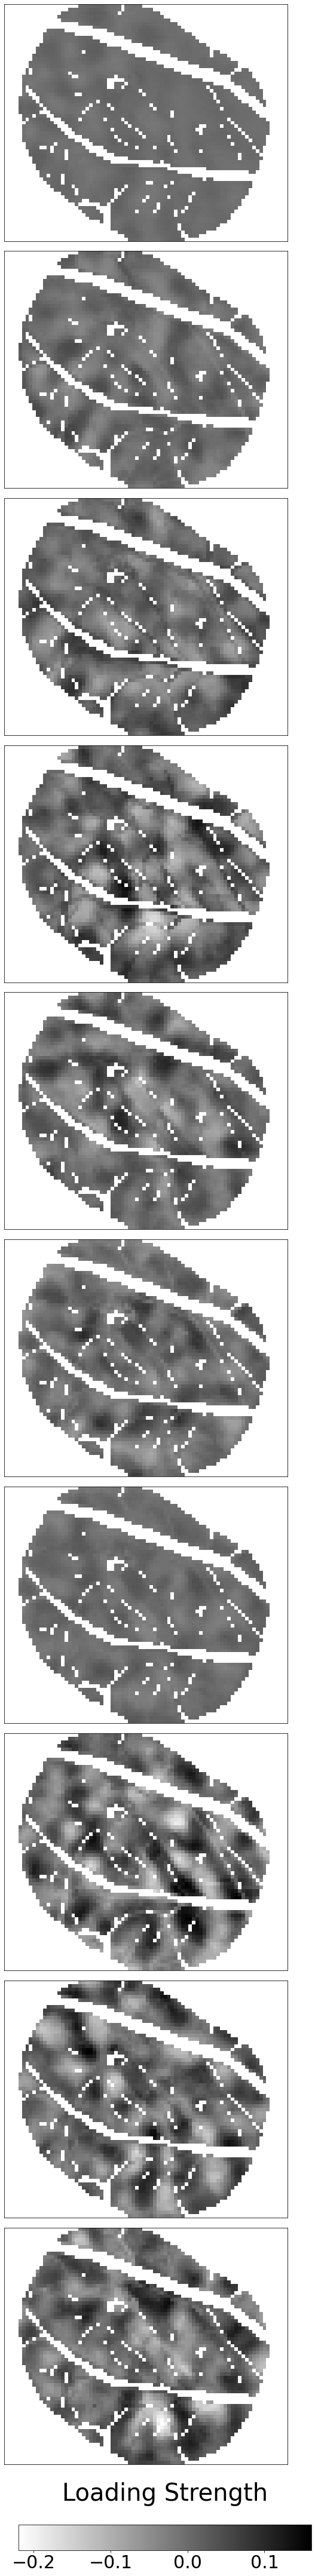

In [114]:
# Forward, Output Domain
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[1][:,:ax.shape[0]].min(), model_components[1][:,:ax.shape[0]].max()
print(model_components[1][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[1][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_pls_yloadings10_complex_sub_cfix_trial.png")
plt.show()

(3072, 100) (532, 100)
(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 55405.28it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 47549.34it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59039.64it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 60385.85it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59715.07it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 48406.90it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 54266.76it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 51166.00it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61048.81it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57173.91it/s]


(10, 5360) (5360,)


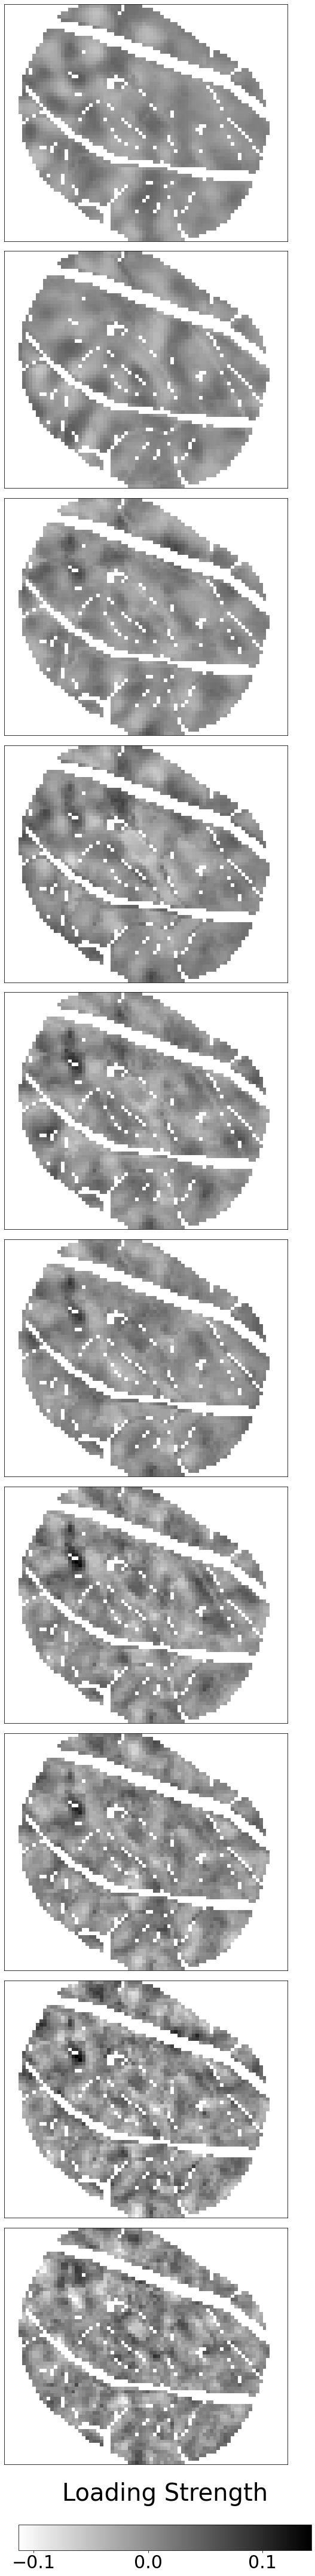

In [110]:
# Backward, Input Domain
path = "Document Plots/"
direction = "backward"
input_duration = 0.3
model = pickle.load(open("Linear Mapping/PLS_complex_sub_subeset_None_trial_delay0.1_duration0.3_True_singleFalse_ridgeFalse.p", "rb"))
model_components = [model.x_rotations_, model.y_loadings_]

print(model_components[0].shape, model_components[1].shape)
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[0][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_pls_xloadings10_complex_sub_cfix_trial.png")
plt.show()

(532, 10)


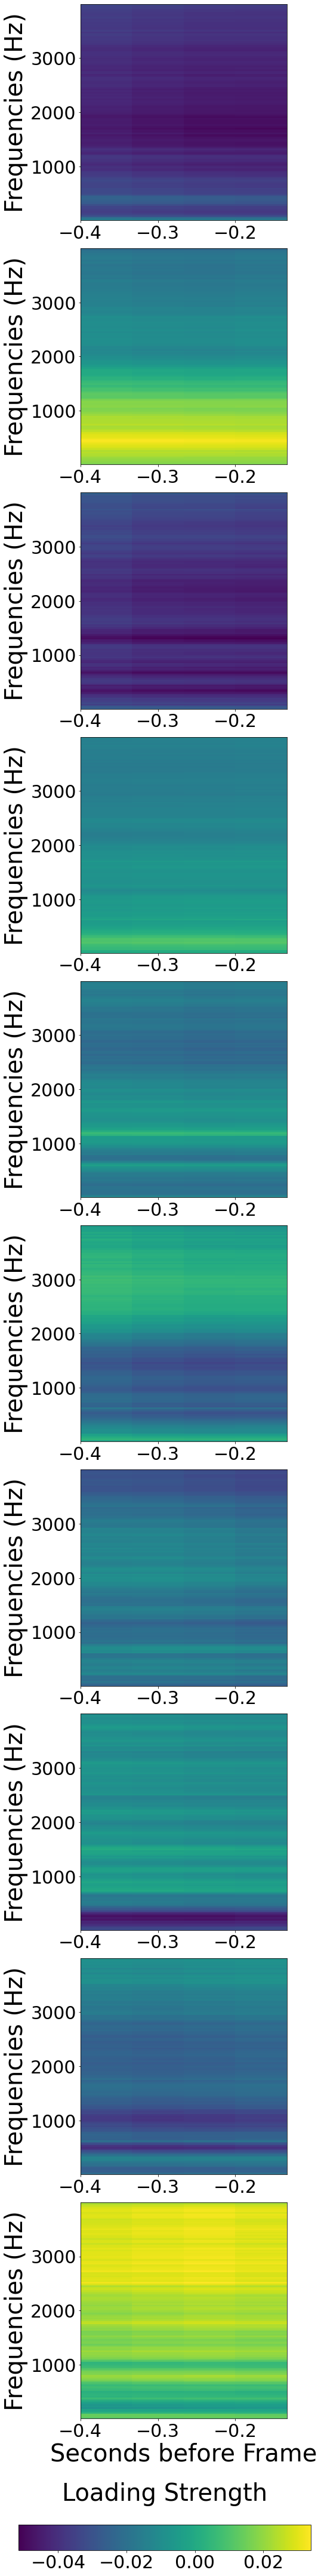

In [99]:
# Backward, Output Domain
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[1][:,:ax.shape[0]].min(), model_components[1][:,:ax.shape[0]].max()
print(model_components[1][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = model_components[1][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    
    ax[c].set_ylabel('Frequencies (Hz)')
    if c == 9:
        ax[c].set_xlabel("Seconds before Frame")
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_pls_yloadings10_complex_sub_cfix_trial.png")
plt.show()

### PLS Canonical

(532, 25) (3072, 25)
(532, 10)


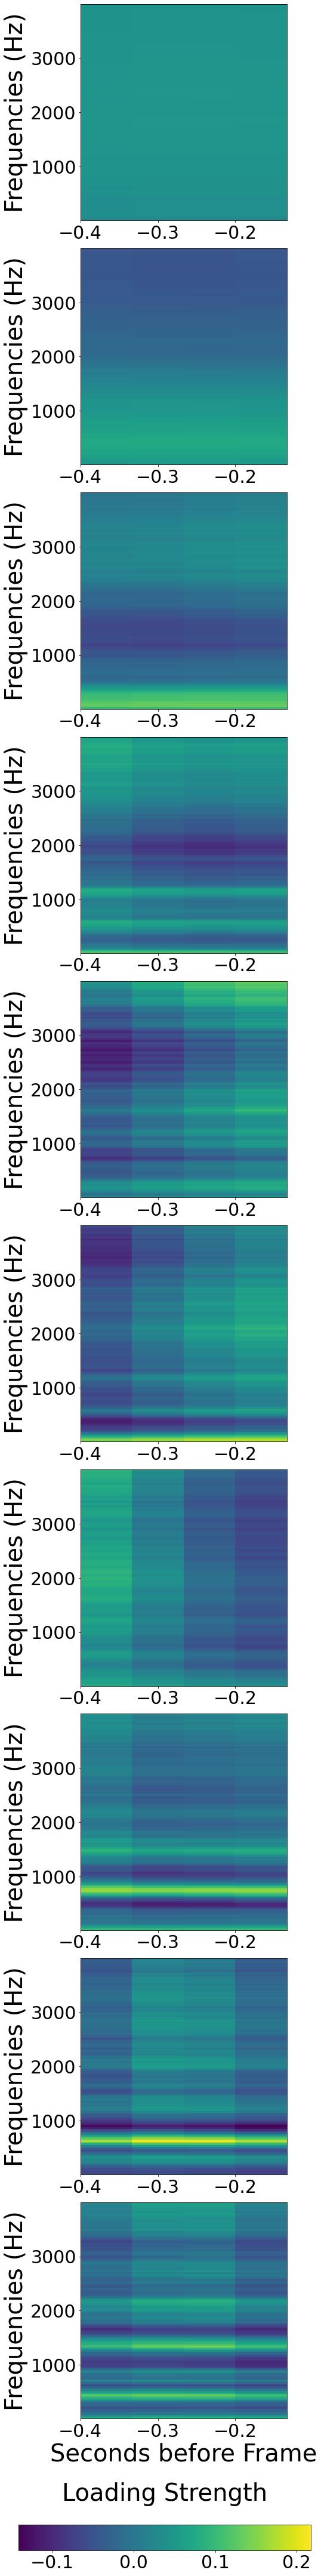

In [74]:
# Forward
# Forward, Input Domain

path = "Document Plots/"
direction = "forward"
input_duration = 0.3
model = pickle.load(open("Linear Mapping/PLSCAN_complex_sub_subeset_None_trial_delay0.1_duration0.3_False_singleFalse_ridge1000.p", "rb"))
model_components = [model.x_loadings_, model.y_loadings_]

print(model_components[0].shape, model_components[1].shape)
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = model_components[0][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    
    ax[c].set_ylabel('Frequencies (Hz)')
    if c == 9:
        ax[c].set_xlabel("Seconds before Frame")
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_plscan_xloadings10_complex_sub_cfix_trial.png")
plt.show()

(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 58416.79it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 54305.82it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 49304.28it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 58395.10it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 56583.06it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57787.63it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61048.48it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59038.09it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57188.75it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59688.91it/s]


(10, 5360) (5360,)


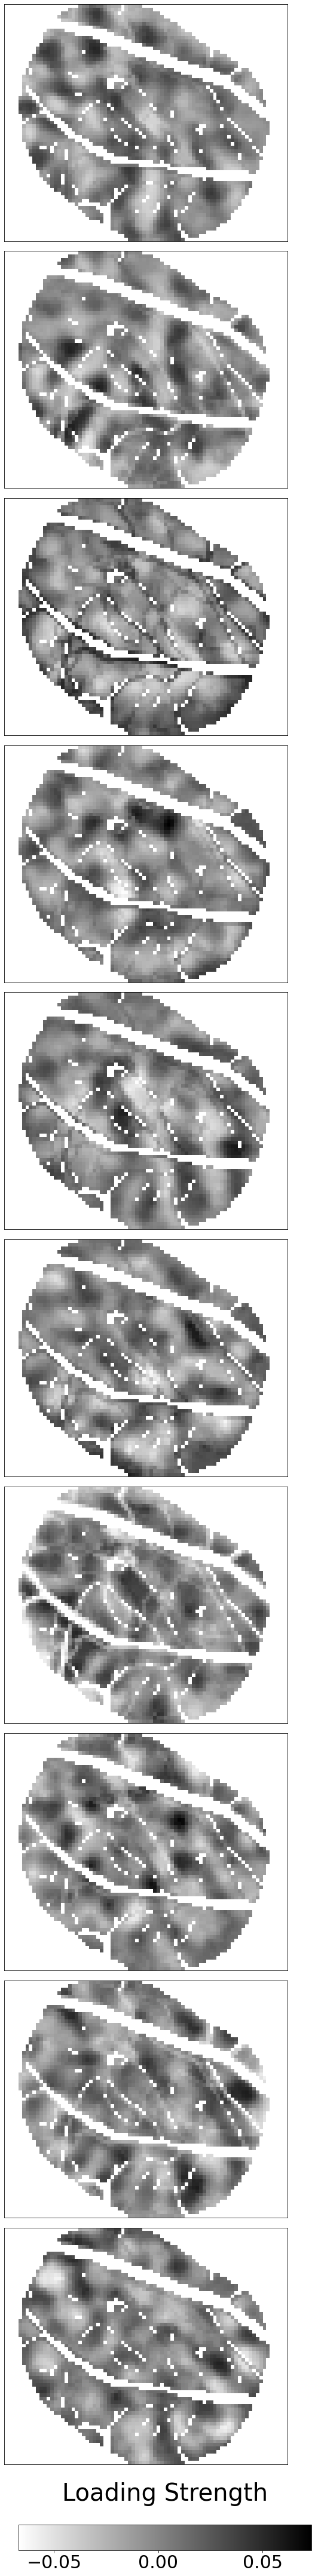

In [75]:
# Forward, Output Domain
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[1][:,:ax.shape[0]].min(), model_components[1][:,:ax.shape[0]].max()
print(model_components[1][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[1][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_plscan_yloadings10_complex_sub_cfix_trial.png")
plt.show()

(3072, 25) (532, 25)
(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 60385.68it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61071.86it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 62491.05it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61047.32it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 63228.70it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 55983.38it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 63978.68it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 54285.50it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 49299.20it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 62492.97it/s]


(10, 5360) (5360,)


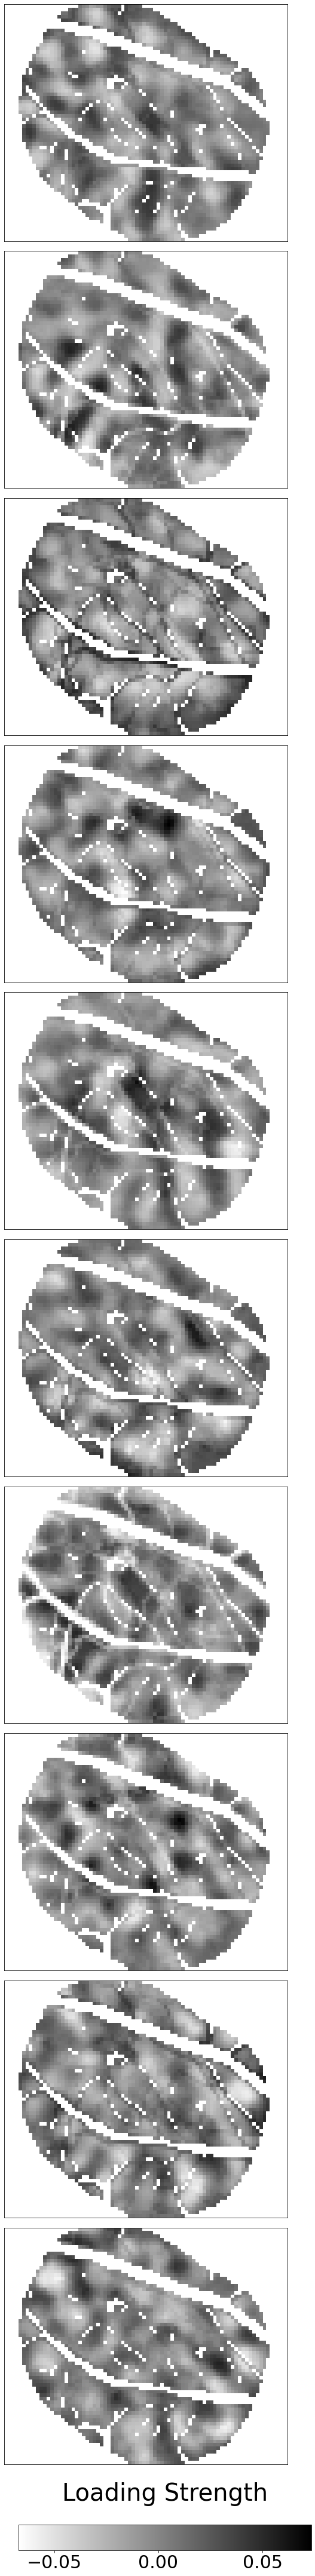

In [95]:
# Backward, Input Domain
path = "Document Plots/"
direction = "backward"
input_duration = 0.3
model = pickle.load(open("Linear Mapping/PLSCAN_complex_sub_subeset_None_trial_delay0.1_duration0.3_True_singleFalse_ridge10000.p", "rb"))
model_components = [model.x_loadings_, model.y_loadings_]

print(model_components[0].shape, model_components[1].shape)
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[0][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_plscan_xloadings10_complex_sub_cfix_trial.png")
plt.show()

(532, 10)


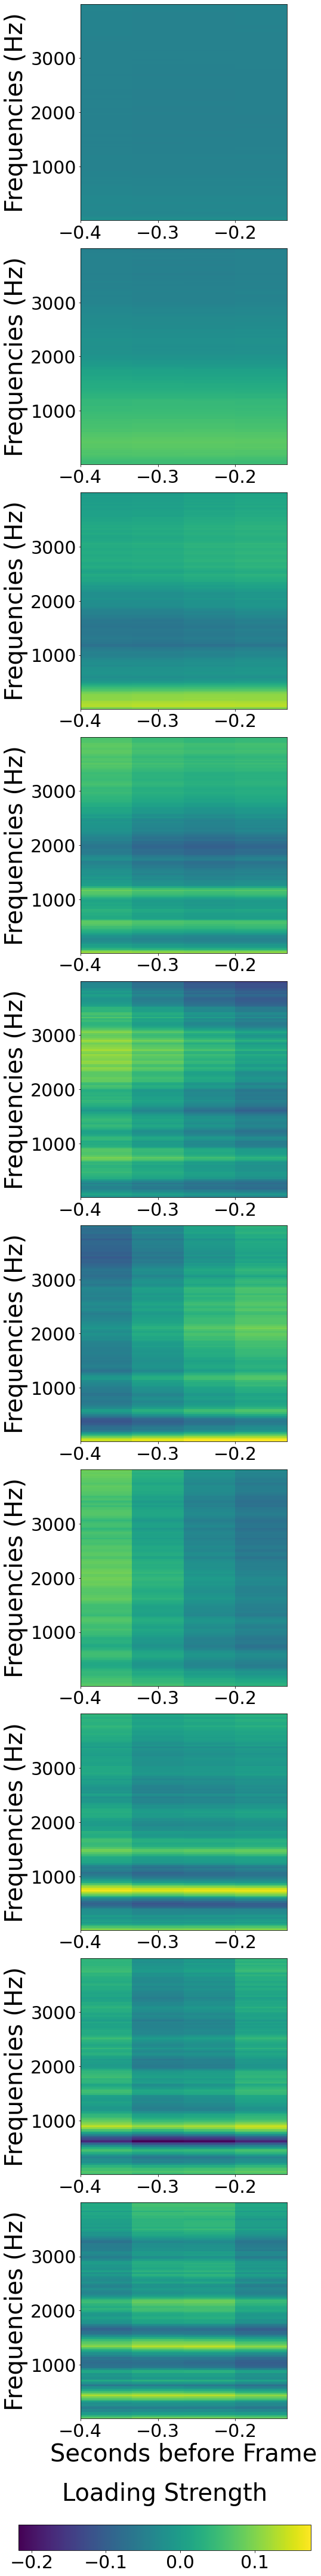

In [96]:
# Backward, Output Domain
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[1][:,:ax.shape[0]].min(), model_components[1][:,:ax.shape[0]].max()
print(model_components[1][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = model_components[1][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    
    ax[c].set_ylabel('Frequencies (Hz)')
    if c == 9:
        ax[c].set_xlabel("Seconds before Frame")
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_plscan_yloadings10_complex_sub_cfix_trial.png")
plt.show()

### RRR

(532, 3072) (3072, 3072)
(532, 10)


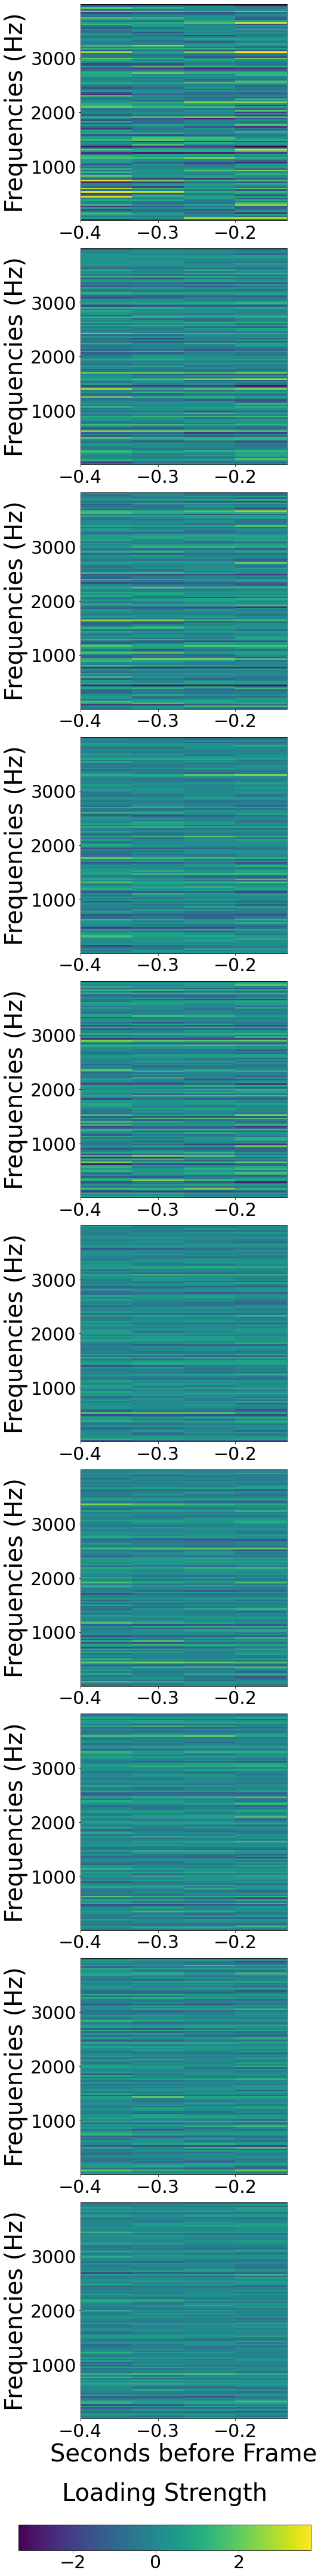

(532, 3072) (3072, 3072)
(532, 10)


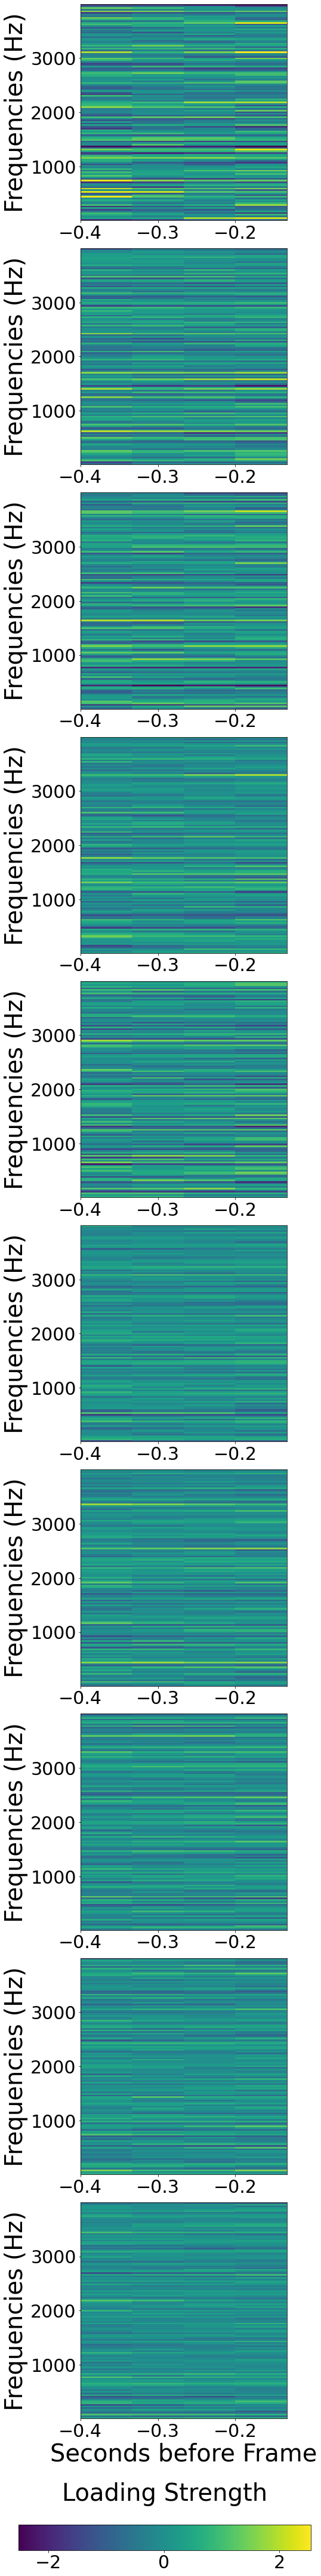

(532, 3072) (3072, 3072)
(532, 10)


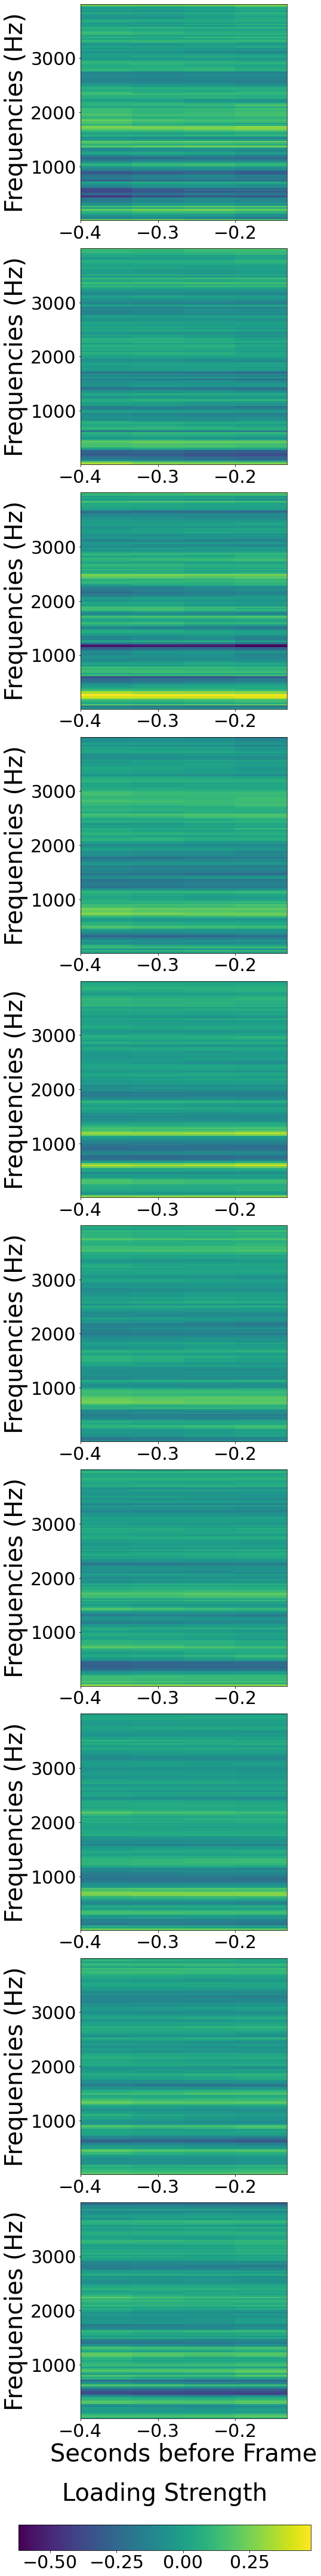

(532, 3072) (3072, 3072)
(532, 10)


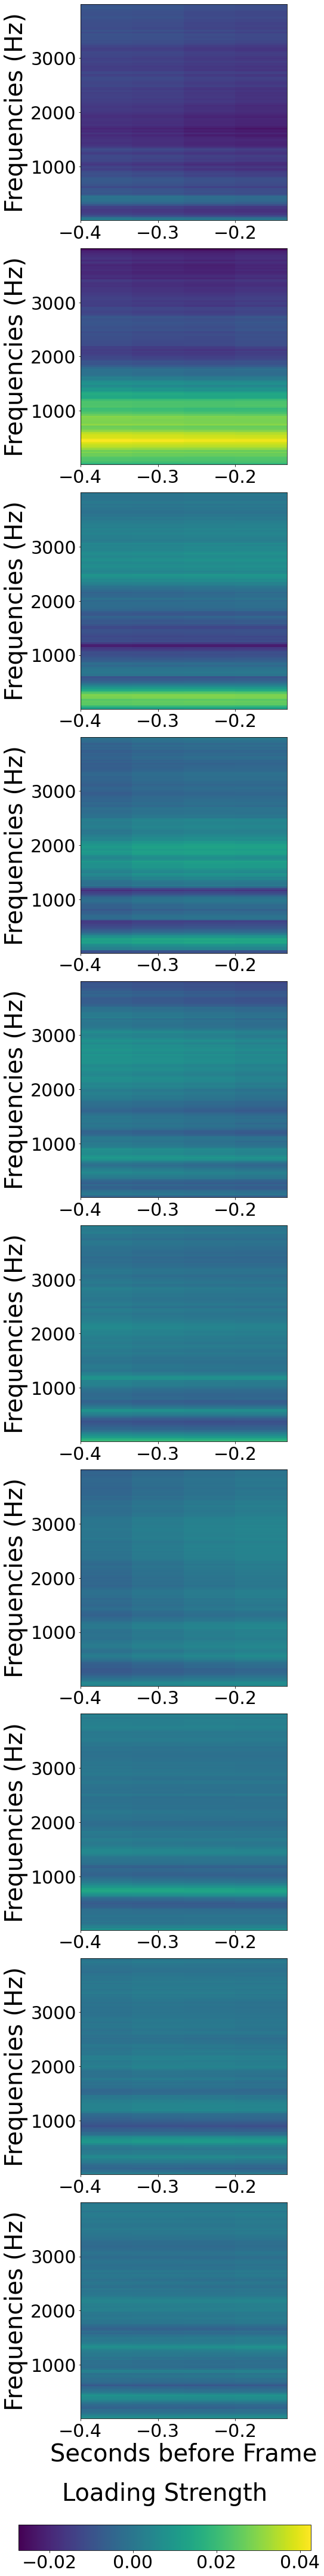

In [153]:
# Forward, Input Domain
class RRR():
    def __init__(self, ridge=False):
        self.ridge = ridge


    def fit(self, X, Y):
        U,s,V = np.linalg.svd(X, full_matrices=False)
        if self.ridge != False:
            self.B = V.T @ np.linalg.inv(np.diag(s**2) + self.ridge * np.identity(s.shape[0])) @ np.diag(s) @ U.T @ Y

        elif self.ridge == False:
            self.B = V.T @ np.diag(s/(s**2)) @ U.T @ Y

        self.U,self.s,self.V = np.linalg.svd(X@self.B, full_matrices=False)


    def predict(self, X, rank):
        w = self.B @ self.V.T[:,:rank]
        v = self.V.T[:,:rank]

        pos = np.argmax(np.abs(v), axis=0)
        flips = np.sign(v[pos, range(v.shape[1])])
        v = v * flips
        w = w * flips
        return X @ w @ v.T
path = "Document Plots/"
direction = "forward"
input_duration = 0.3
for alpha in [1,100,10000,1000000]:
    model = pickle.load(open(f"Linear Mapping/RRR_complex_sub_subeset_None_trial_delay0.1_duration0.3_False_singleFalse_ridge{alpha}.p", "rb"))
    w = model.B @ model.V.T
    v = model.V.T

    pos = np.argmax(np.abs(v), axis=0)
    flips = np.sign(v[pos, range(v.shape[1])])
    v = v * flips
    w = w * flips
    model_components = [w,v]
    print(model_components[0].shape, model_components[1].shape)

    fig, ax = plt.subplots(10,1, figsize=(8,60))
    vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
    print(model_components[0][:,:ax.shape[0]].shape)
    for c in range(0, ax.shape[0]):

        offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
        frequencies = spectrograms[1][1]
        spectrogram = model_components[0][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
        im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)

        ax[c].set_ylabel('Frequencies (Hz)')
        if c == 9:
            ax[c].set_xlabel("Seconds before Frame")
            fig.subplots_adjust(bottom=0.04)
            cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
            cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
            cbar.ax.tick_params(labelsize=30)
            cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
        ax[c].xaxis.label.set_size(40)
        ax[c].yaxis.label.set_size(40)
        ax[c].tick_params(axis='both', which='major', labelsize=10*3)
    fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
    fig.savefig(f"{path}{direction}_rrr_xloadings10_complex_sub_cfix_trial_{alpha}.png")
    plt.show()

(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 53743.43it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 55405.83it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59714.43it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 63980.14it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 62470.39it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 63227.28it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61073.19it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61755.66it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 62051.40it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 63956.84it/s]


(10, 5360) (5360,)


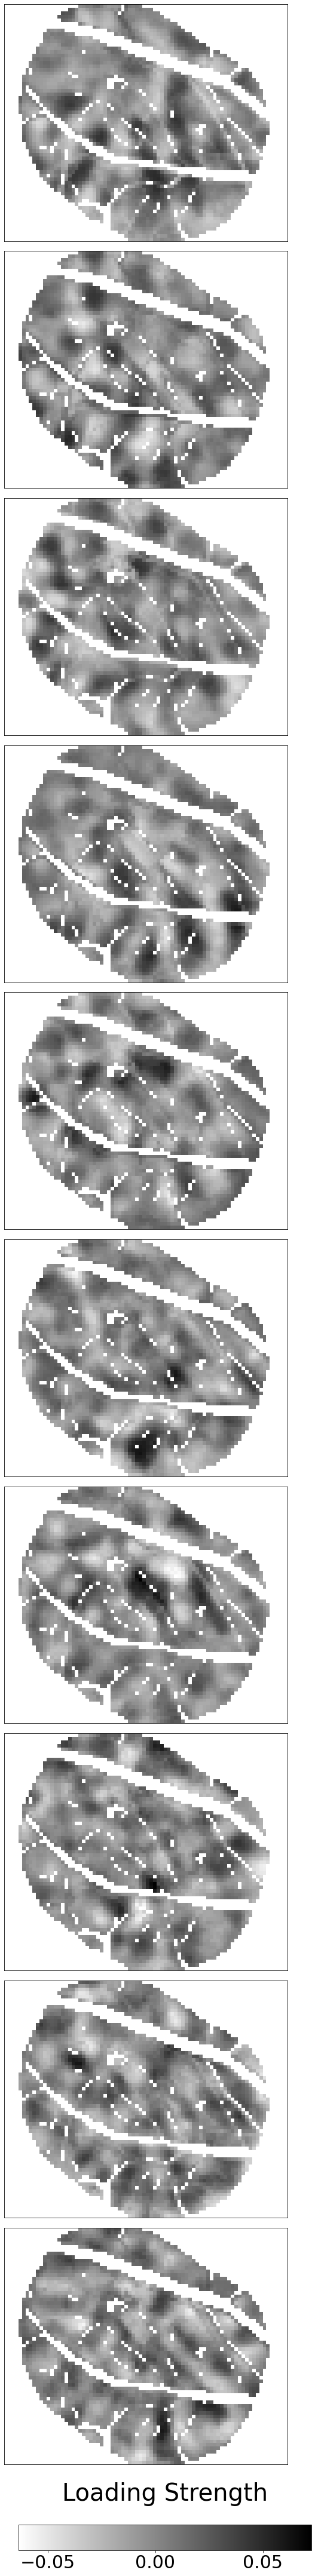

In [88]:
# Forward, Output Domain
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[1][:,:ax.shape[0]].min(), model_components[1][:,:ax.shape[0]].max()
print(model_components[1][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[1][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_rrr_yloadings10_complex_sub_cfix_trial.png")
plt.show()

(3072, 532) (532, 532)
(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61754.64it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 53742.15it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57782.29it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 56552.32it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61755.49it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59058.10it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 54825.50it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61746.84it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 64757.86it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 45161.65it/s]


(10, 5360) (5360,)


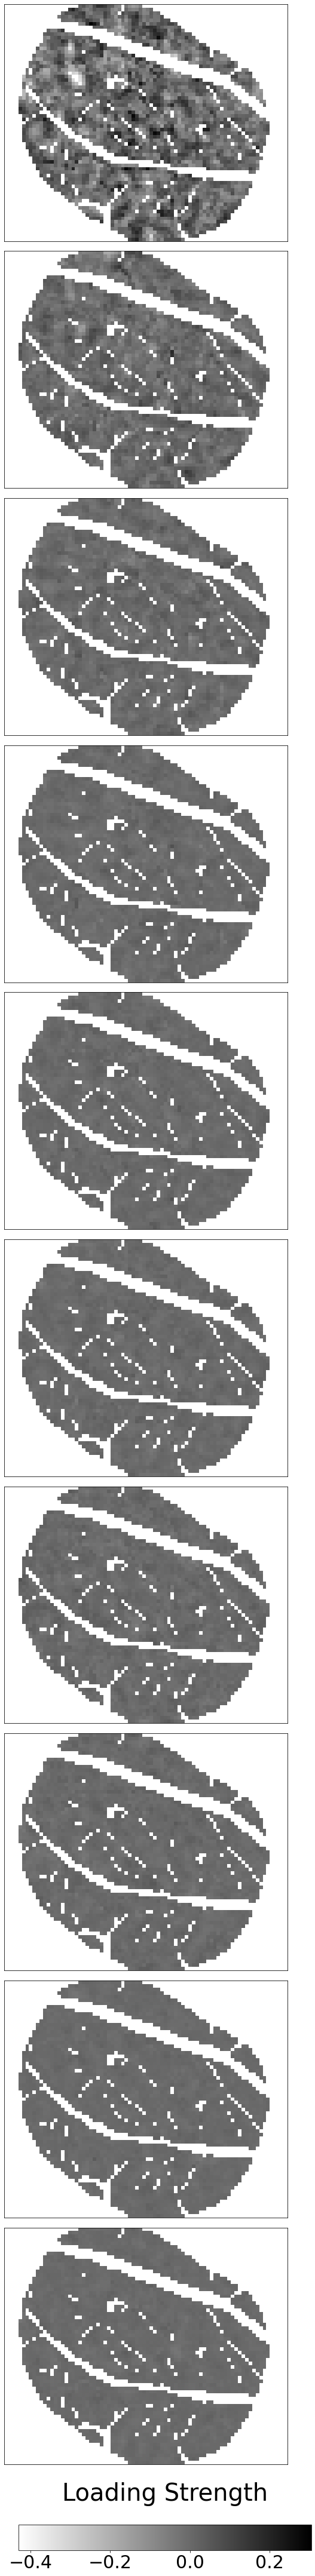

In [102]:
# Backward, Input Domain
path = "Document Plots/"
direction = "backward"
input_duration = 0.3
model = pickle.load(open("Linear Mapping/RRR_complex_sub_subeset_None_trial_delay0.1_duration0.3_True_singleFalse_ridge10000.p", "rb"))
w = model.B @ model.V.T
v = model.V.T

pos = np.argmax(np.abs(v), axis=0)
flips = np.sign(v[pos, range(v.shape[1])])
v = v * flips
w = w * flips
model_components = [w,v]
print(model_components[0].shape, model_components[1].shape)
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[0][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_rrr_xloadings10_complex_sub_cfix_trial.png")
plt.show()

(532, 10)


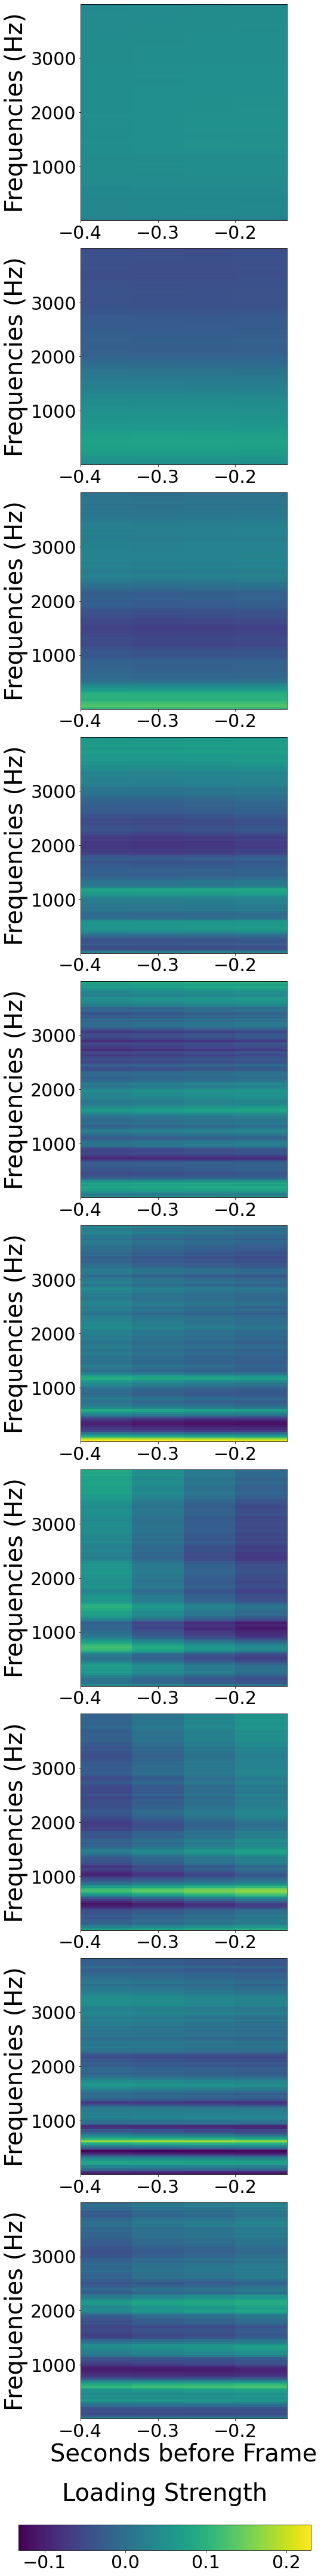

In [103]:
# Backward, Output Domain
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[1][:,:ax.shape[0]].min(), model_components[1][:,:ax.shape[0]].max()
print(model_components[1][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = model_components[1][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    
    ax[c].set_ylabel('Frequencies (Hz)')
    if c == 9:
        ax[c].set_xlabel("Seconds before Frame")
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_rrr_yloadings10_complex_sub_cfix_trial.png")
plt.show()

### PCR

(532, 10)


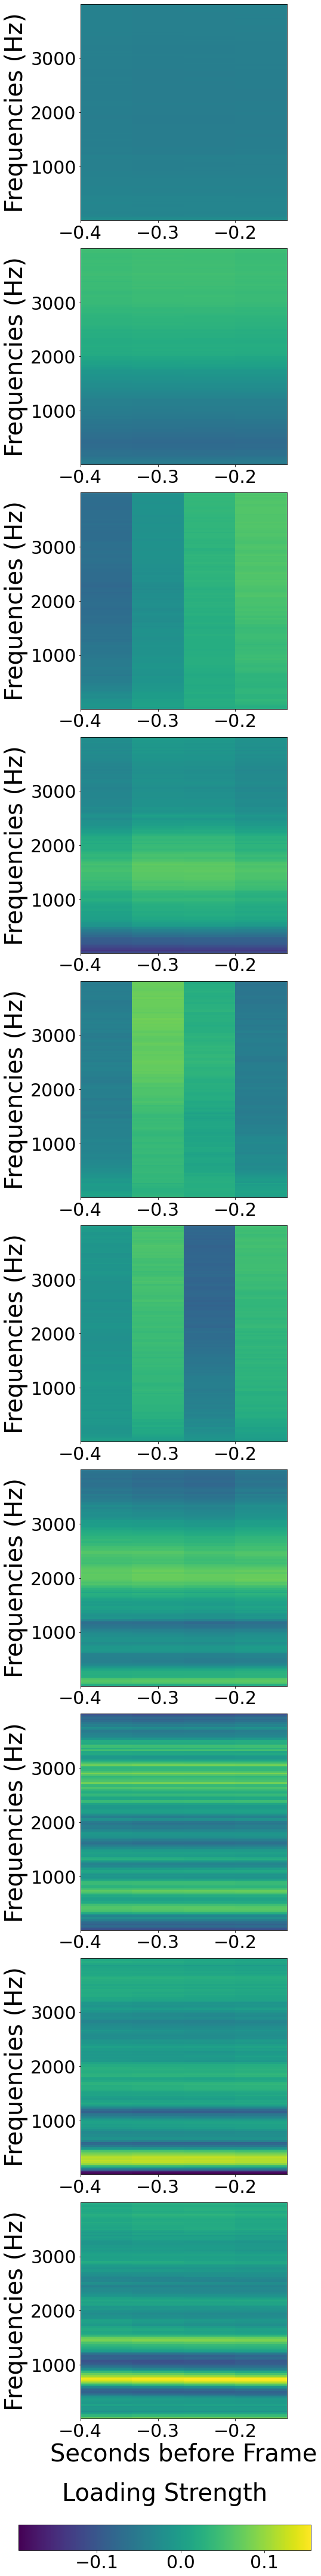

In [71]:
# Forward
model = pickle.load(open("Linear Mapping/PCR_complex_sub_subeset_None_trial_delay0.1_duration0.3_False_singleFalse_ridgeFalse.p", "rb"))
model_components = [model[0].components_.T]

fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
        
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = model_components[0][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    
    ax[c].set_ylabel('Frequencies (Hz)')
    if c == 9:
        ax[c].set_xlabel("Seconds before Frame")
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_pcr_xloadings10_complex_sub_cfix_trial.png")
plt.show()

(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59714.75it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59047.09it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61773.65it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 55981.71it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 63224.43it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 51685.34it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57788.23it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59714.12it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57802.79it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 57787.78it/s]


(10, 5360) (5360,)


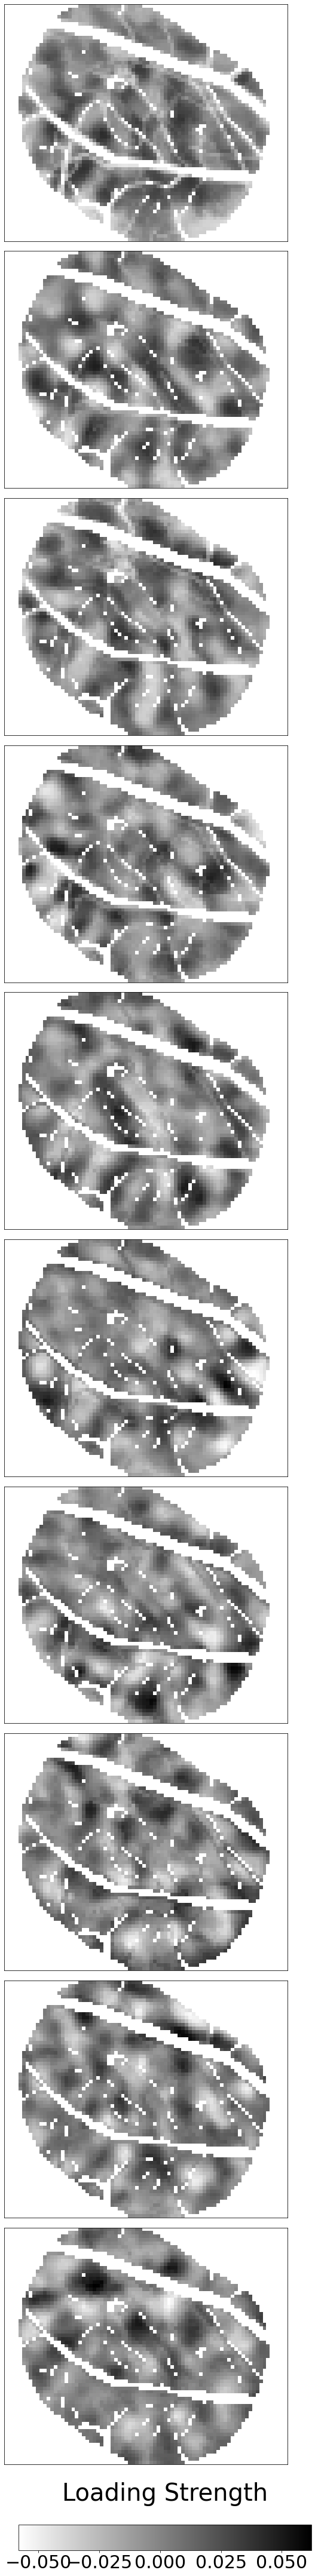

In [105]:
# Backward, Input Domain
path = "Document Plots/"
direction = "backward"
input_duration = 0.3
model = pickle.load(open("Linear Mapping/PCR_complex_sub_subeset_None_trial_delay0.1_duration0.3_True_singleFalse_ridgeFalse.p", "rb"))
model_components = [model[0].components_.T]

fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[0][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_pcr_xloadings10_complex_sub_cfix_trial.png")
plt.show()

### CCA

(532, 25) (3072, 25)
(532, 10)


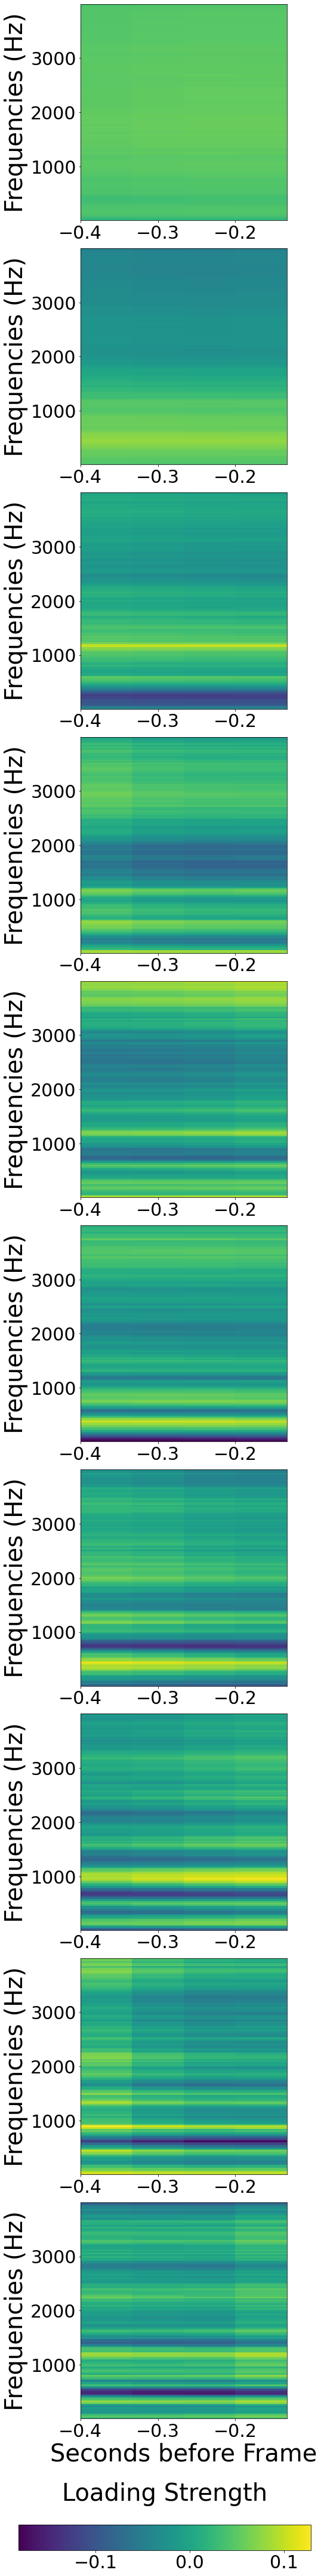

In [111]:
# Forward
class CCA():
    def __init__(self, n_components=2, mode="svd", ridge=False):
        self.mode = mode
        self.n_components = n_components
        self.ridge = ridge
        
    def standardize(self, X):
        X_c = (X - np.mean(X, axis=0) )/ np.std(X, axis=0)
        return X_c
    
    def fit(self, X, Y):
        N = X.shape[0]
        Cxx = (1 / N) * X.T @ X
        Cyy = (1 / N) * Y.T @ Y
        Cxy = (1 / N) * X.T @ Y
        Cyx = (1 / N) * Y.T @ X
        
        if self.mode == "eig":
            if self.ridge == False:
                R = np.linalg.inv(Cyy) @ Cyx @ np.linalg.inv(Cxx) @ Cxy
                eigvals, eigvecs = np.linalg.eig(R)
                self.correlations = np.sqrt(eigvals)
                self.wy = eigvecs[:,:self.n_components]
                self.wx = (np.linalg.inv(Cxx) @ Cxy @ self.wy) / self.correlations[:self.n_components]

            if self.ridge != False:
                print("ridge")
                R = np.linalg.inv(Cyy - self.ridge * np.identity(Cyy.shape[0])) @ Cyx @ np.linalg.inv(Cxx - self.ridge * np.identity(Cxx.shape[0])) @ Cxy
                eigvals, eigvecs = np.linalg.eig(R)
                eigvals, eigvecs = np.real(eigvals), np.real(eigvecs)
                self.correlations = np.sqrt(eigvals)
                self.wy = eigvecs[:,:self.n_components]
                self.wx = (np.linalg.inv(Cxx- self.ridge * np.identity(Cxx.shape[0])) @ Cxy @ self.wy) / self.correlations[:self.n_components]
                #print(self.wy)
                #print(self.wx)
                #print(self.correlations)
            
            return self.wx, self.wy, self.correlations
            
        elif self.mode == "gen_eig":
            print("not implemented")
            pass
            
        elif self.mode == "svd":
            CCxx = np.linalg.cholesky(Cxx)
            CCyy = np.linalg.cholesky(Cyy)

            U, s, V = np.linalg.svd(np.linalg.inv(CCxx) @ Cxy @ np.linalg.inv(CCyy), full_matrices=False)
            """S = np.zeros((4,3))
            for i in range(len(s)):
                S[i,i] = s[i]"""
            self.wx = np.linalg.inv(CCxx) @ U[:,:self.n_components]
            self.wy = np.linalg.inv(CCyy) @ V[:,:self.n_components].T
            self.correclations = s
            
            return self.wx, self.wy, self.correclations
        
    def predict(self, X):
        Y_hat = X @ self.wx @ self.wy.T
        return Y_hat
    
# Forward, Input Domain

path = "Document Plots/"
direction = "forward"
input_duration = 0.3
model = pickle.load(open("Linear Mapping/CCA_complex_sub_subeset_None_trial_delay0.1_duration0.3_False_singleFalse_ridge1000.p", "rb"))

model_components = [model.wx, model.wy]

print(model_components[0].shape, model_components[1].shape)
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[0][:,:ax.shape[0]].min(), model_components[0][:,:ax.shape[0]].max()
print(model_components[0][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    
    offset = np.array([-(int(round(input_duration* 15,1))-j) /15 for j in range(int(round(input_duration* 15,1)))])-0.1
    frequencies = spectrograms[1][1]
    spectrogram = model_components[0][:,c].reshape(len(spectrograms[0][1]),int(round(input_duration* 15,1)))
    im = ax[c].pcolormesh(offset, frequencies, spectrogram, shading='auto', vmin=vmin, vmax = vmax)
    
    ax[c].set_ylabel('Frequencies (Hz)')
    if c == 9:
        ax[c].set_xlabel("Seconds before Frame")
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_cca_xloadings10_complex_sub_cfix_trial.png")
plt.show()

(3072, 10)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 56603.01it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 58417.10it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 59713.96it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 60387.14it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 62493.31it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 54290.61it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 55416.89it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 60360.55it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 63203.81it/s]


(10, 5360) (5360,)


100%|███████████████████████████████████████████████████████████████████████████| 5360/5360 [00:00<00:00, 61751.76it/s]


(10, 5360) (5360,)


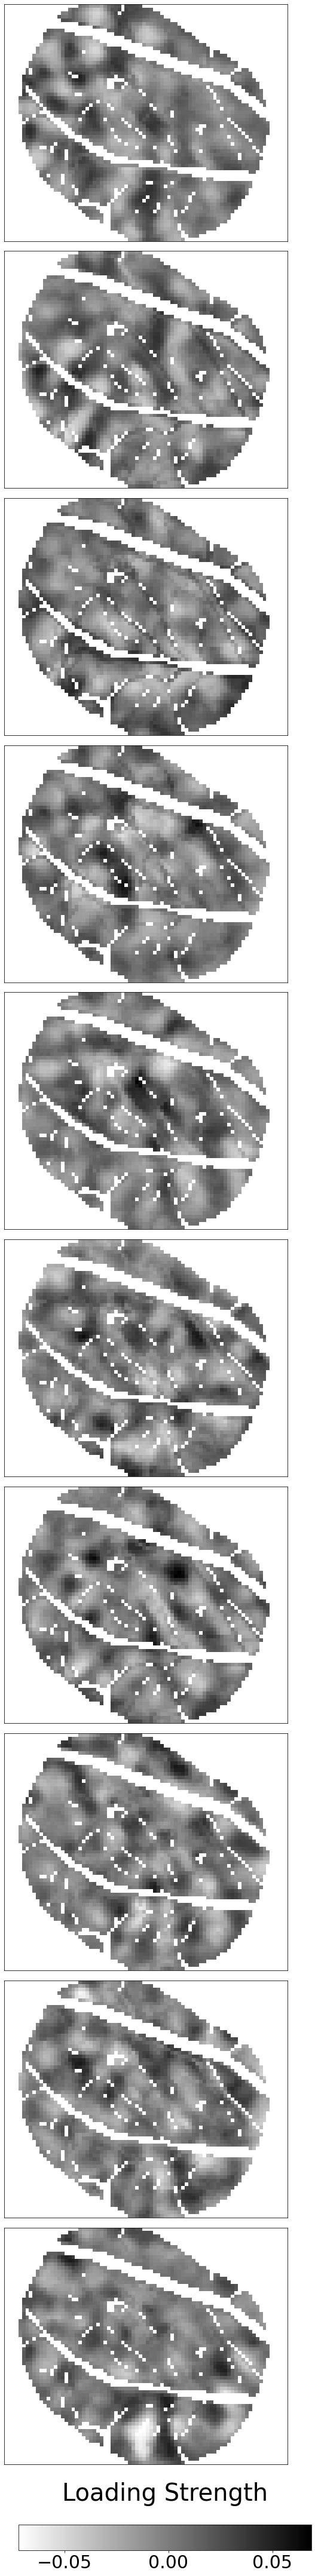

In [112]:
# Forward, Output Domain
fig, ax = plt.subplots(10,1, figsize=(8,60))
vmin, vmax = model_components[1][:,:ax.shape[0]].min(), model_components[1][:,:ax.shape[0]].max()
print(model_components[1][:,:ax.shape[0]].shape)
for c in range(0, ax.shape[0]):
    im = ax[c].imshow(reverse_preprocessing_img(model_components[1][:,0:10].T, relevance_cutoff=0.25, ds=4)[c], cmap="binary", vmin=vmin, vmax=vmax)
    if c == 9:
        fig.subplots_adjust(bottom=0.04)
        cbar_ax = fig.add_axes([0.1, 0.01, 0.85, 0.01])
        cbar = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.2)
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label('Loading Strength', rotation=0, fontsize=40, labelpad=-150)
    ax[c].xaxis.label.set_size(40)
    ax[c].yaxis.label.set_size(40)
    ax[c].tick_params(axis='both', which='major', left=False,bottom=False,labelbottom=False,labelleft=False, labelsize=10*3)
fig.tight_layout(rect=[0.04, 0.04, 0.9, 1])    
fig.savefig(f"{path}{direction}_cca_yloadings10_complex_sub_cfix_trial.png")
plt.show()

# Exemplary Spectrograms

In [24]:
def plot_spectrogram(times, frequencies, spectrogram, scaling="decibels", yscale="log", 
                     show=True, save=False, img_format=".png"):
        path = "Document Plots/"
        fig, ax = plt.subplots(1,1,figsize=(6,4.5))
    
        if scaling == "decibels":  
            im = ax.pcolormesh(times, frequencies, spectrogram,
                               shading='auto', norm=colors.LogNorm(vmin=spectrogram.min(), vmax=spectrogram.max()))
        elif scaling != "decibels":
            im = ax.pcolormesh(times, frequencies, spectrogram,
                               shading='auto')
            
        ax.set_yscale(yscale)
        ax.set_ylim(min(frequencies),max(frequencies))
        #ax.set_ylabel('Frequency [Hz]', fontsize=15)
        #ax.set_xlabel('Time before the frame, T [sec]', fontsize=15)
        ax.tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)
        #fig.subplots_adjust(right=0.8)
        #cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        #fig.colorbar(im, cax=cbar_ax) 
        
        if type(save) == str:
            #fig.suptitle(save, fontsize=16)
            fig.savefig(path+save+img_format)
        if show == True:
            plt.show()
        


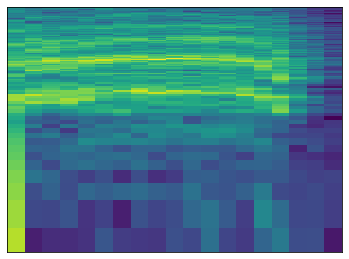

In [30]:
times = np.array([-(15-j)/15 for j in range(15)])
#plot_spectrogram(times,spectrograms[0][1],X[1000,:].reshape((len(spectrograms[0][1]),15)),scaling="linear")
plot_spectrogram(spectrograms[73][0],spectrograms[73][1],spectrograms[73][2],scaling="linear", save="spectro3")

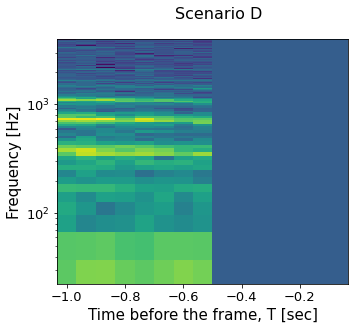

In [72]:
plot_spectrogram(times,spectrograms[0][1],X[1095,:].reshape((len(spectrograms[0][1]),15)),scaling="linear", save="Scenario D")

# Image Preprocessing Plot

In [125]:
tseries = "tseries_23"
DF_by_F0_351_50= np.load(open("auditorycoding/F189/"+tseries+"/DF_by_F0_351_50.npy", "rb"))
#DF_by_F0_351_50_downsampled_nomask = pickle.load(open("auditorycoding/F189/"+tseries+"/DF_by_F0_351_50_downsampled_nomask.p", "rb"))
#DF_by_F0_351_50_downsampled2x_nomask = pickle.load(open("auditorycoding/F189/"+tseries+"/DF_by_F0_351_50_downsampled2x_nomask.p", "rb"))

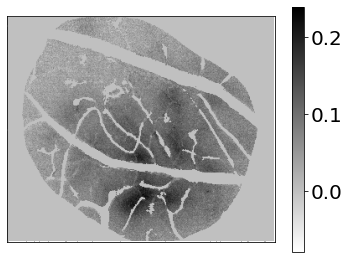

(11736, 270, 320)


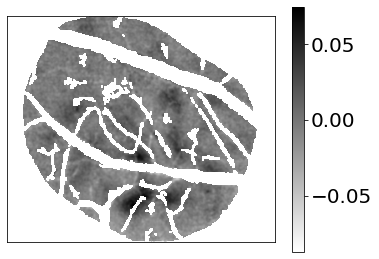

'\nfig, ax = plt.subplots(1,1,figsize=(6,4.5))\nim = ax.imshow(DF_by_F0_351_50_downsampled_nomask[frame]*mask_downsampled, cmap="binary", vmin=vmin, vmax=vmax)\ncbar = fig.colorbar(im, ax=ax)\ncbar.ax.tick_params(labelsize=20)\nax.tick_params(axis=\'both\', which=\'major\', labelsize=20)\nfig.savefig(f"{path}preprocessing3.png")\nplt.show()\nprint(DF_by_F0_351_50_downsampled_nomask.shape)\n\n\nfig, ax = plt.subplots(1,1,figsize=(6,4.5))\nim = ax.imshow(DF_by_F0_351_50_downsampled2x_nomask[frame]*mask_downsampled2x, cmap="binary", vmin=vmin, vmax=vmax)\n#cbar = fig.colorbar(im, ax=ax)\n#cbar.ax.tick_params(labelsize=20)\nax.tick_params(axis=\'both\', which=\'both\', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)#tick_params(axis=\'both\', which=\'major\', labelsize=20)\nfig.savefig(f"{path}post3.png")\nplt.show()\nprint(DF_by_F0_351_50_downsampled2x_nomask.shape)'

In [131]:

path = "Document Plots/"
frame = 1050
mask, mask_downsampled, mask_downsampled2x, roi, roid, roid2x = generate_masks(relevance_cutoff=0.25)
vmin, vmax = np.nanmin(DF_by_F0_351_50[frame]), np.nanmax(DF_by_F0_351_50[frame])
fig, ax = plt.subplots(1,1,figsize=(6,4.5))
im = ax.imshow(DF_by_F0_351_50[frame]*mask, cmap="binary", vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=20)
ax.tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)#tick_params(axis='both', which='major', labelsize=20)
plt.show()
fig.savefig(f"{path}preprocessing1.5.png")
print(DF_by_F0_351_50.shape)

fig, ax = plt.subplots(1,1,figsize=(6,4.5))
mask = mask.astype(bool)
im = ax.imshow(lowhigh_normalize(DF_by_F0_351_50[frame],mask=mask, sig_high=(100/5.4945054945054945), sig_low=1), cmap="binary")
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=20)
ax.tick_params(axis='both', which='both', left=False,bottom=False,labelbottom=False,labelleft=False,labelsize=13)#tick_params(axis='both', which='major', labelsize=20)

fig.savefig(f"{path}preprocessing2.png")
plt.show()


# Regularization Path for MLR

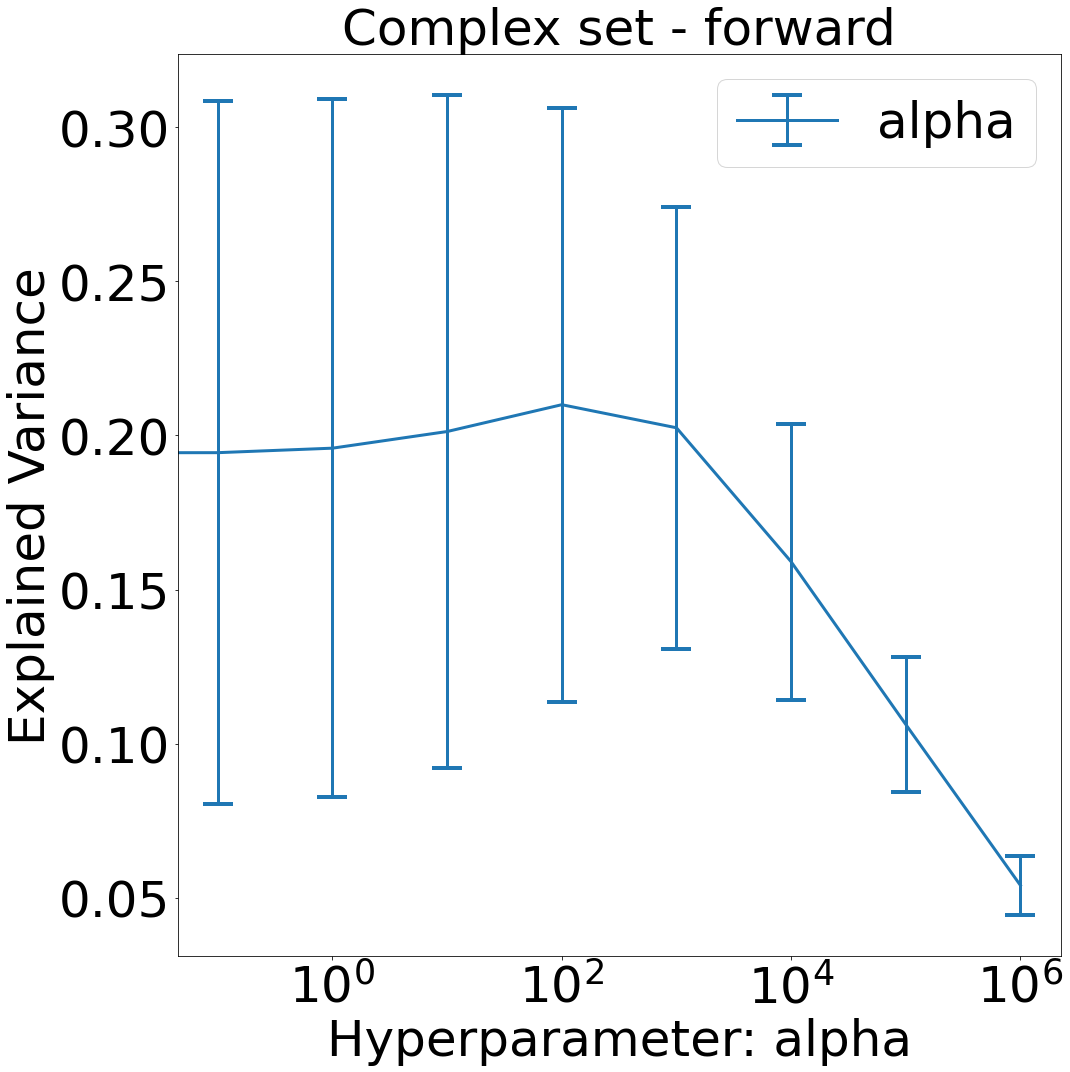

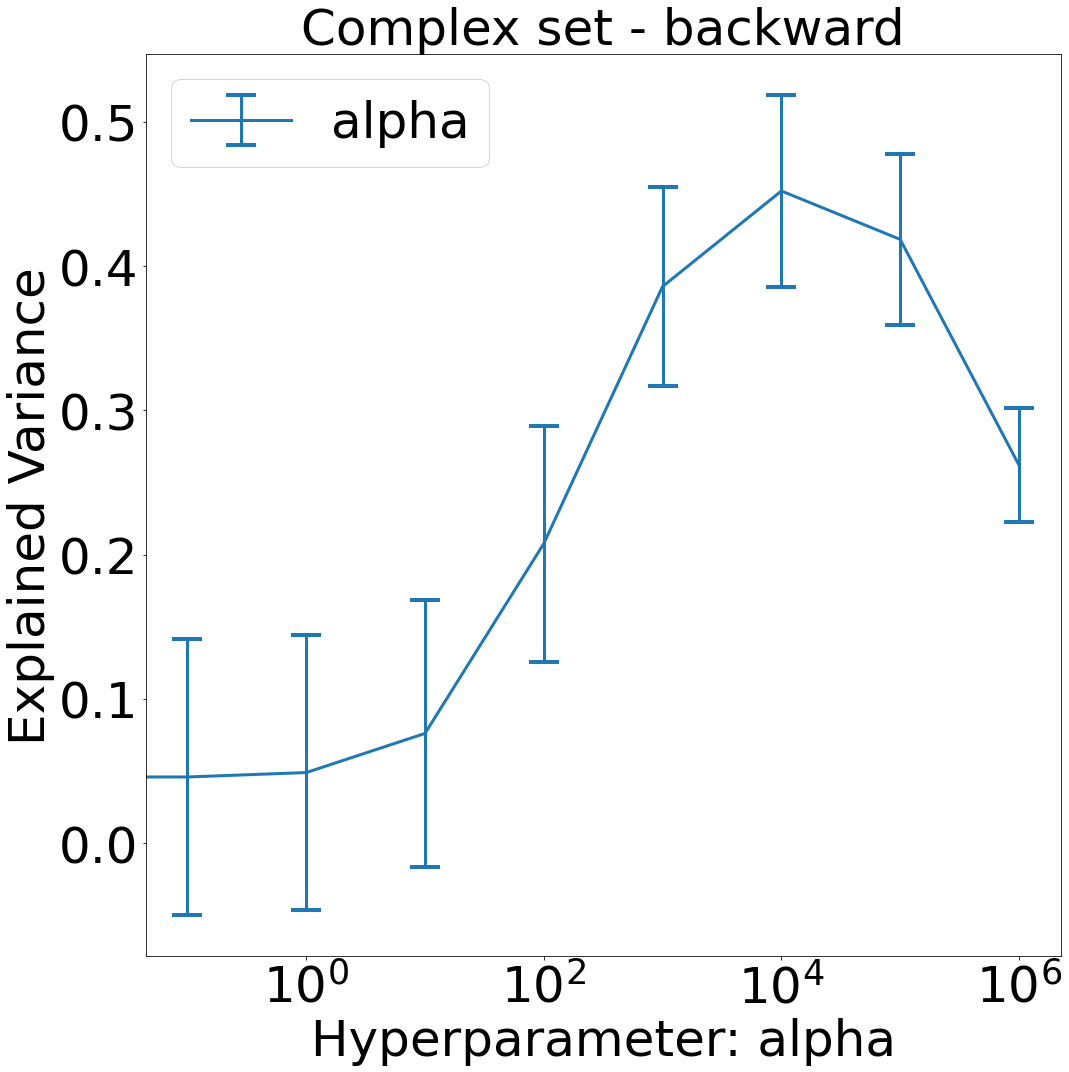

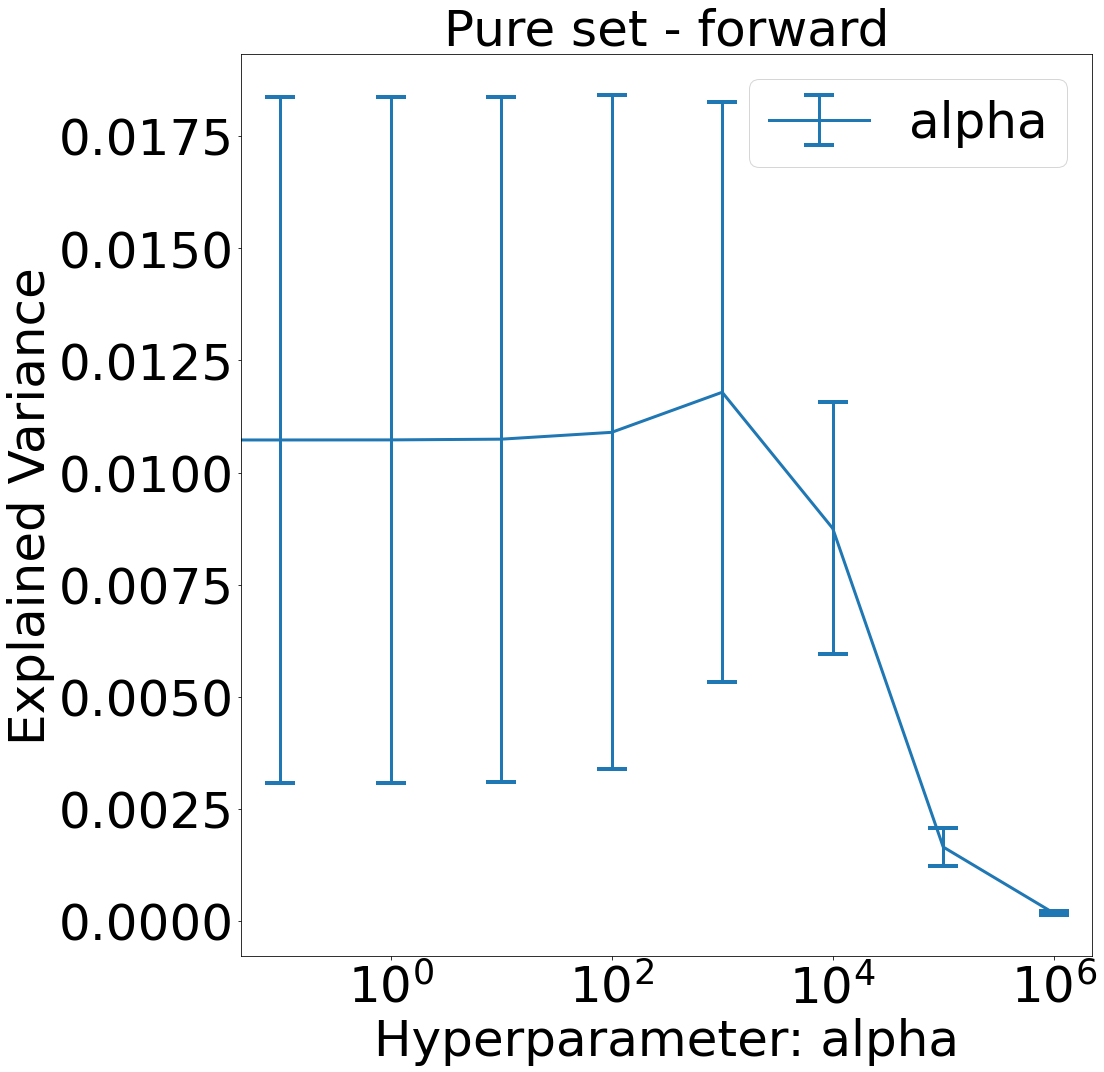

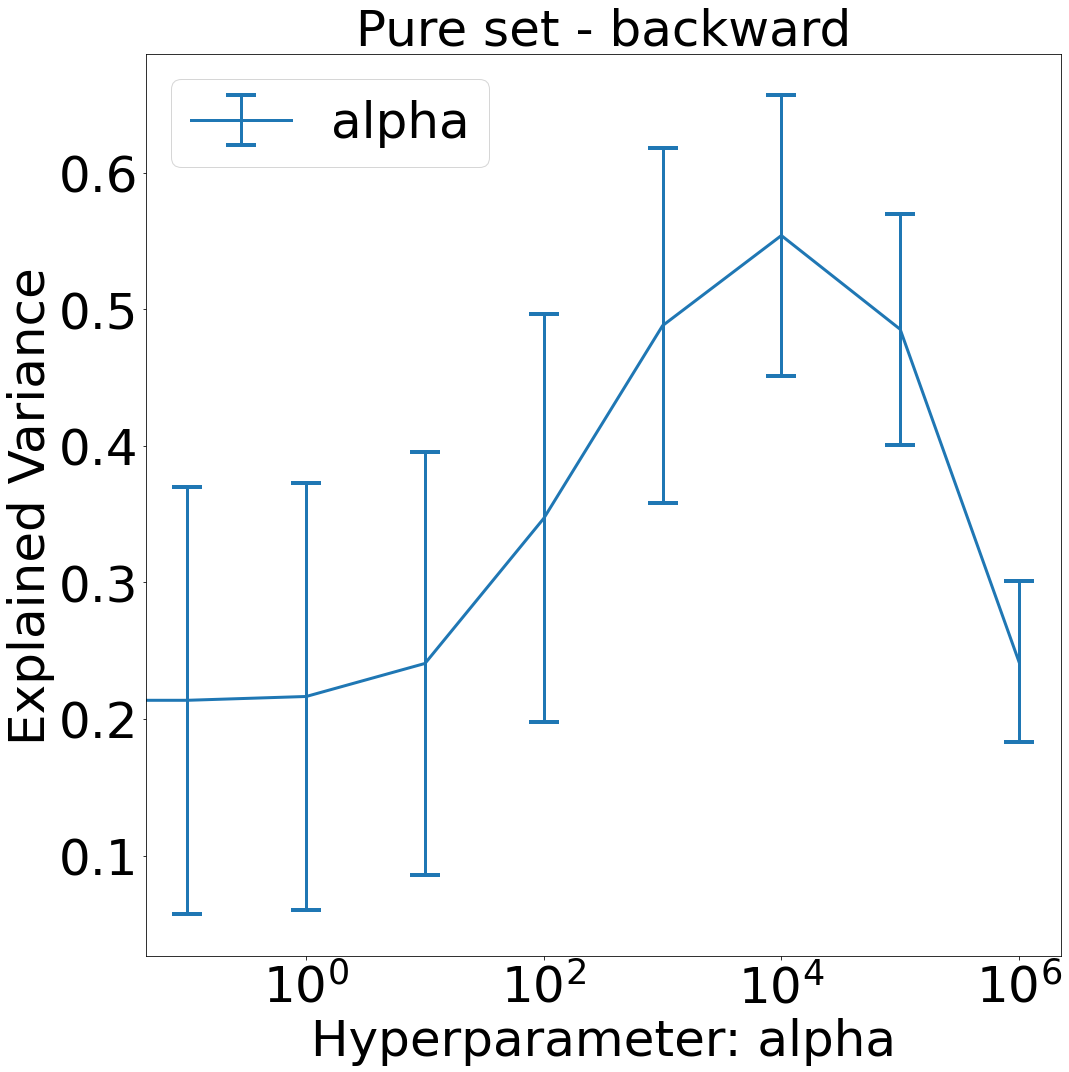

In [150]:
input_durations=["", "duration[0.7]_", "", "duration[0]_" ]
alphas = [0,0.1,1,10,100,1000,10000,100000,1000000]
modes = ["complex_sub_subeset_None_trial_False_singleFalse",
         "complex_sub_subeset_None_trial_True_singleFalse",
         "pure_subeset_None_trial_False_singleTrue",
         "pure_subeset_None_trial_True_singleTrue"]
path = "Document Plots/"

xlabels = ["Hyperparameter: alpha", "Hyperparameter: alpha", "Hyperparameter: alpha", "Hyperparameter: alpha"]
title = ["Complex set - forward", "Complex set - backward", "Pure set - forward", "Pure set - backward"]

for m, mode in enumerate(modes):
    fig, ax =plt.subplots(1,1, figsize=(15,15), sharey=False)
    ymean = []
    ystd = []
    for alpha in alphas:
        cv_scores = np.load(f"Linear Mapping/LR_{mode}_{input_durations[m]}evs_ridge{alpha}.npy")[0,-1,0,:,:]
        average_scores = np.mean(cv_scores, axis=(0,1))
        ymean.append(average_scores)
        yerr = np.std(np.mean(cv_scores, axis=(1)), axis=0)
        ystd.append(yerr)
        
    ax.errorbar(alphas, ymean, yerr=ystd,label="alpha", capsize=15, capthick=4, elinewidth=3, lw=3)
    ax.set_xscale("log")
    ax.legend(prop={'size': 50})
    ax.set_title(title[m],fontdict={"size":50})
    ax.set_xlabel(xlabels[0])
    ax.set_ylabel("Explained Variance")
    ax.xaxis.label.set_size(50)
    ax.yaxis.label.set_size(50)
    ax.tick_params(axis='both', which='major', labelsize=50)

    #fig.suptitle("Hyperparameter search for the Ridge Regression model", fontsize=50)
    fig.tight_layout()
    #fig.text(-0.03, 0.5, 'Explained Variance', va='center', rotation='vertical', fontdict={'fontsize':15*3})

    fig.savefig(f"{path}ridge_regression_alphasearch_{mode}.png")
    plt.show()